# Interview CaseStudy

The attached data is of customers who had taken loan from a Bank. There are independent attributes computed from Bureau and Demographics. 

Dependant variable name: (30_DPD_F3M or BOUNCE_F3M) Build a binary classification model using this bad definition.
Use any binary classification technique you are comfortable with, use any coding language.

There are two files with independent features, join the files using the common key available in data.

1. Publish Univariate statistics for numerical variables

2. Publish distribution for categorical variables

3. Publish how many missing values and special values are there for each of the independent variables

4. Present the model keeping business users in mind.

#### Data Science Life Cycle - CRISP-DM

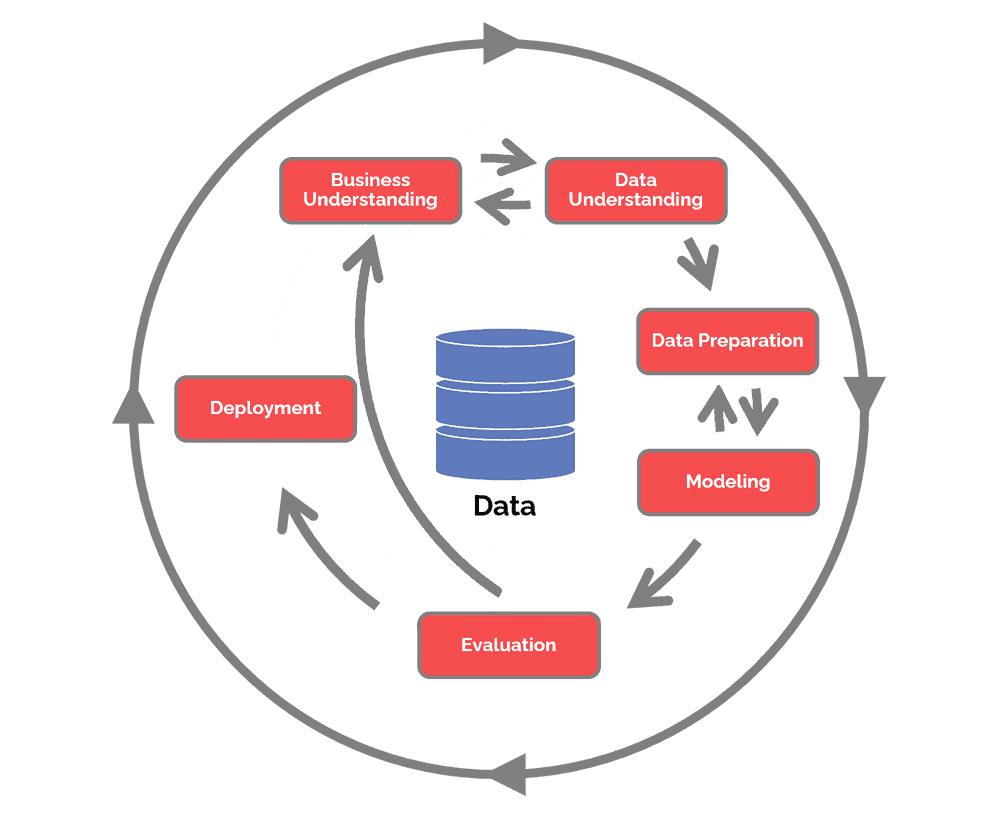

# IMPORT Libraries

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Other Dependent Libraries
from sklearn import tree

from sklearn.model_selection import RepeatedStratifiedKFold,  RepeatedKFold

from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.feature_selection import f_regression

from sklearn.feature_selection import SelectKBest

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.tree import DecisionTreeClassifier

from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler

import xgboost as xgb


# GET the Data, Join and preprocessing

In [3]:
df_train = pd.read_csv('x_train.csv')
df_test = pd.read_csv('x_test.csv')

y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

## Install XG Boost (Boosting Algorithm for Feature selection tool Boruta)

In [ ]:
# !pip install xgboost

In [ ]:
# !pip install Boruta

# Scaling the data to make ML model ready

Machine Learning models input the scaled inputs for processing. Each feature can be considered as an independent vector making up a whole matrix. Independence is checked through several means and after rigorous checks and confirmation important principal features are finalised.


In [5]:
scaler = StandardScaler()
scaler.fit(df_train.values)

StandardScaler()

In [6]:
X_train = scaler.transform(df_train.values)
X_train = pd.DataFrame(X_train, columns=df_train.columns)

In [7]:
X_test = scaler.fit_transform(df_test.values)
X_test = pd.DataFrame(X_test, columns=df_test.columns)

# Decision Tree Model

In [15]:
try:
       
    model_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=6)
    
    cv_score = cross_val_score(model_tree,X_train, y_train, cv = cv, scoring='roc_auc')
    
    cv_score

except Exception as e:
    print(e)

In [16]:
np.mean(cv_score)

0.5850469810124712

Print Training set score for DT model  75.71563180296975 %
Classification Report for the DT model 
               precision    recall  f1-score   support

         0.0       0.76      1.00      0.86     15580
         1.0       0.38      0.00      0.01      4939

    accuracy                           0.76     20519
   macro avg       0.57      0.50      0.43     20519
weighted avg       0.67      0.76      0.66     20519



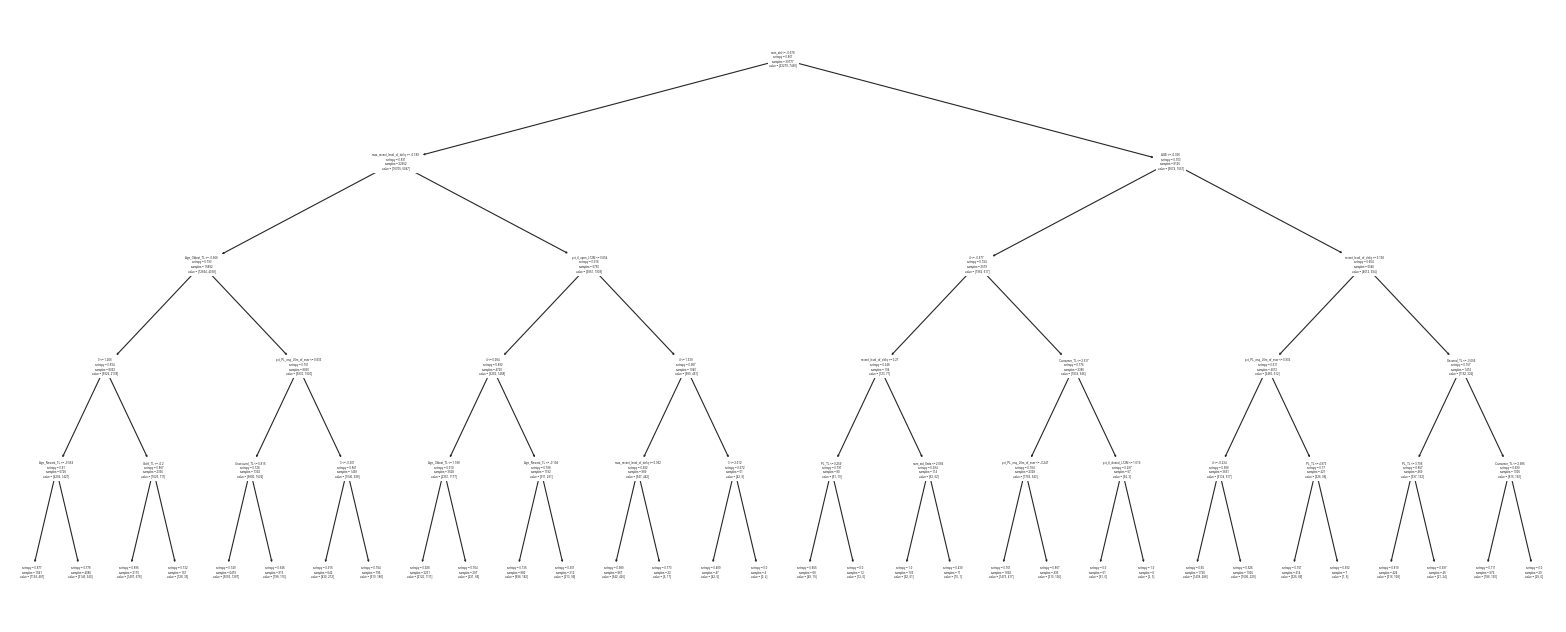

In [21]:
try:
    model_tree.fit(X_train, y_train) # for training

    y_hat_dt = model_tree.predict(X_test)

    print("Print Training set score for DT model ", model_tree.score(X_train,y_train)*100,"%")

    print("Classification Report for the DT model \n",classification_report(y_test,y_hat_dt))
    
    plt.figure(figsize=(25,10), dpi=80)
    
    tree.plot_tree(model_tree,max_depth=5,feature_names= df_train.columns)

except Exception as e:
    print(e)

In [22]:
print("Confusion Matrix for DT MODEL")
pd.DataFrame(confusion_matrix(y_test,y_hat_dt),columns=['Pred 0','Pred 1'], index=['Actual 0', 'Actual 1'])

Confusion Matrix for DT MODEL


,Pred 0,Pred 1
Actual 0,15552,28
Actual 1,4922,17


# XGBoost Model

### First Try with default settings

In [42]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Failed in classifying - Low Bias and High Variance

In [43]:
y_hat = xgb_model.predict(X_test)

print("Training Set Score ", xgb_model.score(X_train,y_train)*100,"%")

print("Test Set score ",xgb_model.score(X_test,y_test)*100,"%")

Training Set Score  81.947558241544 %
Test Set score  74.80871387494517 %


### Second Try with manual settings

Source code for following : https://towardsdatascience.com/selecting-optimal-parameters-for-xgboost-model-training-c7cd9ed5e45e 

In [9]:
from sklearn.model_selection import GridSearchCV as GSV

import time

eval_set = [(X_train, y_train), (X_test, y_test)]

estimators = [100, 200]

depth = [5, 10]

eta = [0.01, 0.03, 0.05]

g = [10, 11, 12]

childweight = [ 5, 9, 15, 20, 25]

C = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]

param_grid = dict(n_estimators = estimators, max_depth = depth, learning_rate = eta, min_child_weight = childweight, gamma = g)

xgb_model = xgb.XGBClassifier(verbose = 1, subsample = 0.33);

grid = GSV(estimator= xgb_model, param_grid= param_grid, cv = 5, n_jobs= -5 )

start_time = time.time()

grid_result = grid.fit(X_train, y_train.values.ravel(), early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [23]:
xgb_model = xgb.XGBClassifier(verbose=2, gamma = 10, learning_rate = 0.05, max_depth = 10, min_child_weight = 15, n_estimators = 200)

xgb_model.fit(X_train,y_train)

[18:54:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=15, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
y_hat_xgb = xgb_model.predict(X_test)

print("Training Set Accuracy Score ", xgb_model.score(X_train,y_train)*100,"%")

print("Test Set Accuracy score ",xgb_model.score(X_test,y_test)*100,"%")

Training Set Accuracy Score  75.85534652500243 %
Test Set Accuracy score  75.85652322237925 %


In [26]:
print("Classification Report for the XGBoost model \n",classification_report(y_test,y_hat_xgb))

Classification Report for the XGBoost model 
               precision    recall  f1-score   support

         0.0       0.76      1.00      0.86     15580
         1.0       0.38      0.00      0.01      4939

    accuracy                           0.76     20519
   macro avg       0.57      0.50      0.44     20519
weighted avg       0.67      0.76      0.66     20519



Text(0, 0.5, 'True Positive Rate')

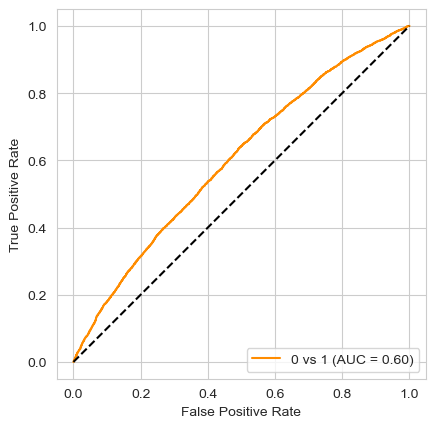

In [28]:
y_score_xgb = xgb_model.predict_proba(X_test)

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test,
    y_score_xgb[:,1],
    name="0 vs 1",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.6)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

<AxesSubplot:>

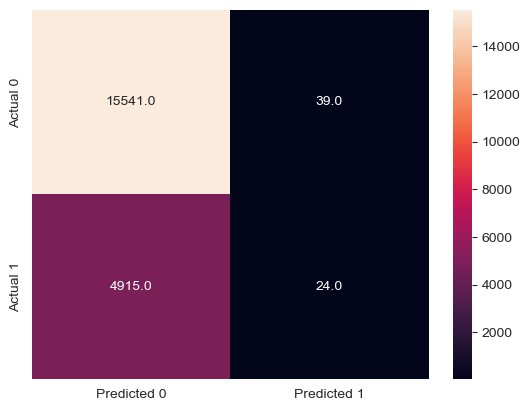

In [29]:
cm = confusion_matrix(y_test,y_hat_xgb)

sns.heatmap(cm,annot=True,fmt = '.1f', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Logistic Regression

In [10]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

c = [2.0, 3.0, 4.0, 5.0, 6.0, 6.5, 7.0, 7.5, 8.0]

param_grid = dict(solver = solver, C = c)

lr = LogisticRegression(random_state = 6 ,max_iter=500, verbose=2) 

grid_lr = GSV(estimator= lr, param_grid=param_grid, cv = 5, n_jobs=-5)

grid_result_lr = grid_lr.fit(X_train, y_train)

print("Best score: %f using %s"%(grid_result_lr.best_score_, grid_result_lr.best_params_))

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was 

RUNNING THE L-BFGS-B CODE

           * * *

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
Machine precision = 2.220D-16
 N =           54     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70660D+04    |proj g|=  6.31250D+03
 N =           54     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70660D+04    |proj g|=  6.31250D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           54     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70667D+04    |proj g|=  6.31200D+03

At iterate    1    f=  1.41072D+04    |proj g|=  1.53936D+03

At iterate    1    f=  1.42997D+04    |proj g|=  1.85633D+03

At iterate    1    f=  1.42375D+04    |proj g|=  1.74260D+03

At iterate    2    f=  1.40589D+04    |proj g|=  1.49949D+03

At iterate    2    f=  1.39509D+04    |proj g|=  1.26909D+03

At

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed wh

At iterate   88    f=  1.33511D+04    |proj g|=  2.22909D-01

At iterate   87    f=  1.33422D+04    |proj g|=  2.38052D-01

At iterate   89    f=  1.33511D+04    |proj g|=  4.26651D-01

At iterate   88    f=  1.33422D+04    |proj g|=  2.33767D-01

At iterate   90    f=  1.33511D+04    |proj g|=  1.87035D-01

At iterate   89    f=  1.33422D+04    |proj g|=  2.64405D-01

At iterate   91    f=  1.33511D+04    |proj g|=  1.40661D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   54     91     97      1     0     0   1.407D-01   1.335D+04
  F =   13351.059821953908     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



At iterate   90    f=  1.33574D+04    |proj g|=  2.79184D-01
iter  2 act 2.310e+02 pre 2.122e+02 delta 1.207e+00 f 2.695e+04 |g| 1.789e+03 CG  14

At iterate   91    f=  1.33574D+04    |proj g|=  1.94931D-01

At iterate   92    f=  1.33574D+04    |proj g|=  1.85443D-01

At iterate   93    f=  1.33574D+04    |proj g|=  1.72313D-01

At iterate   94    f=  1.33574D+04    |proj g|=  2.29265D-01

At iterate   95    f=  1.33574D+04    |proj g|=  1.93779D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   54     95    100      1     0     0   1.938D-01   1.336D+04
  F =   13357.384524364246     

CONVERGENCE: REL_REDUCTION_

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 

iter  1 act 7.163e+03 pre 6.820e+03 delta 1.097e+00 f 3.413e+04 |g| 1.357e+04 CG   4
iter  5 act 5.621e-02 pre 5.617e-02 delta 1.226e+00 f 2.669e+04 |g| 8.127e+00 CG  29
iter  5 act 3.816e-02 pre 3.815e-02 delta 1.203e+00 f 2.672e+04 |g| 6.269e+00 CG  29
iter  2 act 2.290e+02 pre 2.099e+02 delta 1.199e+00 f 2.697e+04 |g| 1.818e+03 CG  16
iter  6 act 1.629e-04 pre 1.629e-04 delta 1.226e+00 f 2.669e+04 |g| 6.827e-01 CG  17
iter  6 act 9.552e-05 pre 9.552e-05 delta 1.203e+00 f 2.672e+04 |g| 5.354e-01 CG  18
iter  3 act 3.165e+01 pre 3.056e+01 delta 1.199e+00 f 2.674e+04 |g| 3.947e+02 CG  23
iter  4 act 7.793e-01 pre 7.730e-01 delta 1.199e+00 f 2.671e+04 |g| 6.508e+01 CG  27
iter  5 act 9.320e-03 pre 9.315e-03 delta 1.199e+00 f 2.671e+04 |g| 4.898e+00 CG  28
iter  6 act 8.568e-05 pre 8.567e-05 delta 1.199e+00 f 2.671e+04 |g| 3.791e-01 CG  31


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

Epoch 1, change: 1.00000000
Epoch 2, change: 0.41161195
Epoch 3, change: 0.24524610
Epoch 4, change: 0.17747316
Epoch 5, change: 0.12398623
Epoch 6, change: 0.11126768
Epoch 7, change: 0.08868392
Epoch 8, change: 0.07036907
Epoch 9, change: 0.05593605
Epoch 10, change: 0.05651454
Epoch 11, change: 0.06042831
Epoch 12, change: 0.05752104
Epoch 13, change: 0.05524588
Epoch 14, change: 0.05304245
Epoch 15, change: 0.05342455
Epoch 16, change: 0.05342700
Epoch 17, change: 0.05276631
Epoch 18, change: 0.05012483
Epoch 19, change: 0.04791726
Epoch 20, change: 0.04540612
Epoch 21, change: 0.04343912
Epoch 22, change: 0.04175556
Epoch 23, change: 0.03985218
Epoch 24, change: 0.03812746
Epoch 25, change: 0.03666009
Epoch 26, change: 0.03529737
Epoch 27, change: 0.03395936
Epoch 28, change: 0.03255591
Epoch 29, change: 0.03156950
Epoch 30, change: 0.03034928
Epoch 31, change: 0.02934130
Epoch 32, change: 0.02838659
Epoch 33, change: 0.02745327
Epoch 34, change: 0.02656920
Epoch 35, change: 0.025

Epoch 52, change: 0.01Epoch 1, change: 1.00000000
Epoch 2, change: 0.34668226
Epoch 3, change: 0.22399182
Epoch 4, change: 0.18411523
Epoch 5, change: 0.10641069
Epoch 6, change: 0.09737703
Epoch 7, change: 0.07780331
Epoch 8, change: 0.06476356
Epoch 9, change: 0.06301494
Epoch 10, change: 0.05909564
Epoch 11, change: 0.04566828
Epoch 12, change: 0.04619701
Epoch 13, change: 0.04737610
Epoch 14, change: 0.04422373
Epoch 15, change: 0.04141967
Epoch 16, change: 0.04108539
Epoch 17, change: 0.04042822
Epoch 18, change: 0.04042918
Epoch 19, change: 0.04017449
Epoch 20, change: 0.03975698
Epoch 21, change: 0.03892161
Epoch 22, change: 0.03891072
Epoch 23, change: 0.03843514
Epoch 24, change: 0.03725966
Epoch 25, change: 0.03590921
Epoch 26, change: 0.03477065
Epoch 27, change: 0.03341759
Epoch 28, change: 0.03220644
Epoch 29, change: 0.03110918
Epoch 30, change: 0.03017786
Epoch 31, change: 0.02908625
Epoch 32, change: 0.02816199
Epoch 33, change: 0.02732182
Epoch 34, change: 0.02642536
E

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Para

711920
Epoch 53, change: 0.01680893
Epoch 54, change: 0.01650620
Epoch 55, change: 0.01616787
Epoch 56, change: 0.01587690
Epoch 57, change: 0.01558982
Epoch 58, change: 0.01531962
Epoch 59, change: 0.01506256
Epoch 60, change: 0.01476617
Epoch 61, change: 0.01452597
Epoch 62, change: 0.01428122
Epoch 63, change: 0.01406544
Epoch 64, change: 0.01380284
Epoch 65, change: 0.01359148
Epoch 66, change: 0.01337409
Epoch 67, change: 0.01313938
Epoch 68, change: 0.01295326
Epoch 69, change: 0.01271837
Epoch 70, change: 0.01254698
Epoch 71, change: 0.01235922
Epoch 72, change: 0.01213590
Epoch 73, change: 0.01199798
Epoch 74, change: 0.01179929
Epoch 75, change: 0.01163588
Epoch 76, change: 0.01146756
Epoch 77, change: 0.01129047
Epoch 78, change: 0.01111115
Epoch 79, change: 0.01097989
Epoch 80, change: 0.01081545
Epoch 81, change: 0.01066269
Epoch 82, change: 0.01052392
Epoch 83, change: 0.01038088
Epoch 84, change: 0.01024581
Epoch 85, change: 0.01008488
Epoch 86, change: 0.00996091
Epoch 8


At iterate   20    f=  1.33633D+04    |proj g|=  8.04102D+01

At iterate   20    f=  1.33784D+04    |proj g|=  4.73468D+01

At iterate   21    f=  1.33599D+04    |proj g|=  5.18547D+01

At iterate   21    f=  1.33745D+04    |proj g|=  3.91745D+01

At iterate   22    f=  1.33567D+04    |proj g|=  3.79954D+01

At iterate   23    f=  1.33549D+04    |proj g|=  2.80267D+01

At iterate   22    f=  1.33735D+04    |proj g|=  6.91186D+01

At iterate   24    f=  1.33535D+04    |proj g|=  3.84334D+01

At iterate   25    f=  1.33525D+04    |proj g|=  2.48977D+01

At iterate   23    f=  1.33723D+04    |proj g|=  3.35114D+01

At iterate   24    f=  1.33713D+04    |proj g|=  2.85066D+01

At iterate   26    f=  1.33517D+04    |proj g|=  2.45417D+01

At iterate   25    f=  1.33701D+04    |proj g|=  3.62692D+01

At iterate   27    f=  1.33499D+04    |proj g|=  3.78528D+01

At iterate   26    f=  1.33691D+04    |proj g|=  5.75887D+01

At iterate   28    f=  1.33488D+04    |proj g|=  5.79319D+01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 This problem is unconstrained.
[Parallel(n_job


At iterate   37    f=  1.33558D+04    |proj g|=  1.18765D+01

At iterate   38    f=  1.33555D+04    |proj g|=  1.75710D+01

At iterate   39    f=  1.33554D+04    |proj g|=  4.27402D+01

At iterate   40    f=  1.33551D+04    |proj g|=  1.68449D+01

At iterate   41    f=  1.33549D+04    |proj g|=  1.08390D+01

At iterate   42    f=  1.33547D+04    |proj g|=  1.37916D+01

At iterate   43    f=  1.33545D+04    |proj g|=  1.24357D+01

At iterate   44    f=  1.33544D+04    |proj g|=  1.98331D+01

At iterate   45    f=  1.33542D+04    |proj g|=  1.24800D+01

At iterate   46    f=  1.33541D+04    |proj g|=  8.53997D+00
701396
Epoch 53, change: 0.01667848
Epoch 54, change: 0.01639586
Epoch 55, change: 0.01608558
Epoch 56, change: 0.01580953
Epoch 57, change: 0.01553266
Epoch 58, change: 0.01526067
Epoch 59, change: 0.01499096
Epoch 60, change: 0.01472450
Epoch 61, change: 0.01448633
Epoch 62, change: 0.01425300
Epoch 63, change: 0.01403839
Epoch 64, change: 0.01378316
Epoch 65, change: 0.01357

iter  6 act 2.397e-04 pre 2.397e-04 delta 1.208e+00 f 4.005e+04 |g| 1.016e+00 CG  27
iter  3 act 6.119e+01 pre 5.898e+01 delta 1.208e+00 f 4.008e+04 |g| 5.718e+02 CG  26
iter  1 act 1.076e+04 pre 1.024e+04 delta 1.096e+00 f 5.120e+04 |g| 2.051e+04 CG   4
iter  4 act 8.897e-01 pre 8.811e-01 delta 1.208e+00 f 4.002e+04 |g| 1.360e+02 CG  21
cg reaches trust region boundary
iter  2 act 3.560e+02 pre 3.258e+02 delta 1.227e+00 f 4.044e+04 |g| 2.781e+03 CG  14
iter  5 act 7.372e-02 pre 7.369e-02 delta 1.208e+00 f 4.002e+04 |g| 1.325e+01 CG  29
iter  3 act 6.138e+01 pre 5.973e+01 delta 1.227e+00 f 4.009e+04 |g| 6.171e+02 CG  25
iter  4 act 1.087e+00 pre 1.056e+00 delta 1.227e+00 f 4.003e+04 |g| 1.493e+02 CG  15
iter  6 act 1.407e-04 pre 1.407e-04 delta 1.208e+00 f 4.002e+04 |g| 6.809e-01 CG  19


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter  1 act 1.072e+04 pre 1.021e+04 delta 1.095e+00 f 5.120e+04 |g| 2.048e+04 CG   4
iter  5 act 1.628e-01 pre 1.626e-01 delta 1.227e+00 f 4.003e+04 |g| 1.478e+01 CG  27
cg reaches trust region boundary
iter  2 act 3.546e+02 pre 3.261e+02 delta 1.203e+00 f 4.048e+04 |g| 2.762e+03 CG  16
iter  6 act 2.326e-04 pre 2.326e-04 delta 1.227e+00 f 4.003e+04 |g| 1.306e+00 CG  15
iter  3 act 5.133e+01 pre 4.926e+01 delta 1.203e+00 f 4.012e+04 |g| 6.195e+02 CG  23
iter  1 act 1.074e+04 pre 1.023e+04 delta 1.097e+00 f 5.120e+04 |g| 2.036e+04 CG   4
iter  2 act 3.439e+02 pre 3.152e+02 delta 1.202e+00 f 4.046e+04 |g| 2.727e+03 CG  16
iter  4 act 9.629e-01 pre 9.572e-01 delta 1.203e+00 f 4.007e+04 |g| 1.132e+02 CG  23


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter  3 act 4.802e+01 pre 4.636e+01 delta 1.202e+00 f 4.011e+04 |g| 5.933e+02 CG  23
iter  5 act 5.734e-02 pre 5.733e-02 delta 1.203e+00 f 4.007e+04 |g| 1.086e+01 CG  29
iter  6 act 1.586e-04 pre 1.586e-04 delta 1.203e+00 f 4.007e+04 |g| 8.613e-01 CG  17
iter  4 act 1.203e+00 pre 1.193e+00 delta 1.202e+00 f 4.006e+04 |g| 1.026e+02 CG  26
iter  5 act 2.009e-02 pre 2.009e-02 delta 1.202e+00 f 4.006e+04 |g| 9.932e+00 CG  29
iter  6 act 1.488e-04 pre 1.488e-04 delta 1.202e+00 f 4.006e+04 |g| 9.074e-01 CG  26


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

och 104, change: 0.00818884
Epoch 105, change: 0.00809122
Epoch 106, change: 0.00799853
Epoch 107, change: 0.00792195
Epoch 108, change: 0.00783535
Epoch 109, change: 0.00775655
Epoch 110, change: 0.00765542
Epoch 111, change: 0.00758154
Epoch 112, change: 0.00751143
Epoch 113, change: 0.00741972
Epoch 114, change: 0.00733531
Epoch 115, change: 0.00725920
Epoch 116, change: 0.00718505
Epoch 117, change: 0.00711501
Epoch 118, change: 0.00704843
Epoch 119, change: 0.00698059
Epoch 120, change: 0.00689391
Epoch 121, change: 0.00682899
Epoch 122, change: 0.00675764
Epoch 123, change: 0.00670309
Epoch 124, change: 0.00662059
Epoch 125, change: 0.00656847
Epoch 126, change: 0.00648895
Epoch 127, change: 0.00643429
Epoch 128, change: 0.00638027
Epoch 129, change: 0.00631310
Epoch 130, change: 0.00623658
Epoch 131, change: 0.00618985
Epoch 132, change: 0.00612345
Epoch 133, change: 0.00607589
Epoch 134, change: 0.00601974
Epoch 135, change: 0.00596063
Epoch 136, change: 0.00590278
Epoch 137, c

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Para

och 104, change: 0.00812247
Epoch 105, change: 0.00801597
Epoch 106, change: 0.00793168
Epoch 107, change: 0.00784075
Epoch 108, change: 0.00776019
Epoch 109, change: 0.00767320
Epoch 110, change: 0.00758751
Epoch 111, change: 0.00749783
Epoch 112, change: 0.00742584
Epoch 113, change: 0.00734240
Epoch 114, change: 0.00724992
Epoch 115, change: 0.00718524
Epoch 116, change: 0.00709988
Epoch 117, change: 0.00703249
Epoch 118, change: 0.00696627
Epoch 119, change: 0.00689364
Epoch 120, change: 0.00680890
Epoch 121, change: 0.00674180
Epoch 122, change: 0.00667193
Epoch 123, change: 0.00661595
Epoch 124, change: 0.00653741
Epoch 125, change: 0.00648285
Epoch 126, change: 0.00639871
Epoch 127, change: 0.00634691
Epoch 128, change: 0.00628936
Epoch 129, change: 0.00622569
Epoch 130, change: 0.00615002
Epoch 131, change: 0.00610017
Epoch 132, change: 0.00604055
Epoch 133, change: 0.00599189
Epoch 134, change: 0.00592717
Epoch 135, change: 0.00587062
Epoch 136, change: 0.00581084
Epoch 137, c

Epoch 153, change: 0.003Epoch 1, change: 1.00000000
Epoch 2, change: 0.41162129
Epoch 3, change: 0.24526059
Epoch 4, change: 0.17747243
Epoch 5, change: 0.12399734
Epoch 6, change: 0.11128611
Epoch 7, change: 0.08870330
Epoch 8, change: 0.07038945
Epoch 9, change: 0.05595782
Epoch 10, change: 0.05653504
Epoch 11, change: 0.06045033
Epoch 12, change: 0.05754541
Epoch 13, change: 0.05527243
Epoch 14, change: 0.05307105
Epoch 15, change: 0.05345526
Epoch 16, change: 0.05345978
Epoch 17, change: 0.05280121
Epoch 18, change: 0.05014821
Epoch 19, change: 0.04794087
Epoch 20, change: 0.04542965
Epoch 21, change: 0.04346289
Epoch 22, change: 0.04177950
Epoch 23, change: 0.03987608
Epoch 24, change: 0.03815136
Epoch 25, change: 0.03668410
Epoch 26, change: 0.03532139
Epoch 27, change: 0.03398339
Epoch 28, change: 0.03257984
Epoch 29, change: 0.03159353
Epoch 30, change: 0.03037322
Epoch 31, change: 0.02936523
Epoch 32, change: 0.02841050
Epoch 33, change: 0.02747715
Epoch 34, change: 0.02659305

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Para

44705
Epoch 154, change: 0.00340402
Epoch 155, change: 0.00336944
Epoch 156, change: 0.00332980
Epoch 157, change: 0.00330322
Epoch 158, change: 0.00326065
Epoch 159, change: 0.00323131
Epoch 160, change: 0.00319326
Epoch 161, change: 0.00315865
Epoch 162, change: 0.00313032
Epoch 163, change: 0.00309923
Epoch 164, change: 0.00305344
Epoch 165, change: 0.00302879
Epoch 166, change: 0.00299902
Epoch 167, change: 0.00296789
Epoch 168, change: 0.00293873
Epoch 169, change: 0.00290144
Epoch 170, change: 0.00287338
Epoch 171, change: 0.00284513
Epoch 172, change: 0.00282026
Epoch 173, change: 0.00278726
Epoch 174, change: 0.00275677
Epoch 175, change: 0.00273132
Epoch 176, change: 0.00270412
Epoch 177, change: 0.00267761
Epoch 178, change: 0.00264912
Epoch 179, change: 0.00262410
Epoch 180, change: 0.00259234
Epoch 181, change: 0.00257255
Epoch 182, change: 0.00254400
Epoch 183, change: 0.00252074
Epoch 184, change: 0.00250128
Epoch 185, change: 0.00246639
Epoch 186, change: 0.00244437
Epoc

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


63730
Epoch 154, change: 0.00359274
Epoch 155, change: 0.00354784
Epoch 156, change: 0.00350730
Epoch 157, change: 0.00348833
Epoch 158, change: 0.00343514
Epoch 159, change: 0.00339987
Epoch 160, change: 0.00336056
Epoch 161, change: 0.00332640
Epoch 162, change: 0.00329037
Epoch 163, change: 0.00325711
Epoch 164, change: 0.00322053
Epoch 165, change: 0.00318413
Epoch 166, change: 0.00315030
Epoch 167, change: 0.00312136
Epoch 168, change: 0.00308632
Epoch 169, change: 0.00305315
Epoch 170, change: 0.00301734
Epoch 171, change: 0.00299004
Epoch 172, change: 0.00296127
Epoch 173, change: 0.00292289
Epoch 174, change: 0.00289533
Epoch 175, change: 0.00286833
Epoch 176, change: 0.00283719
Epoch 177, change: 0.00280640
Epoch 178, change: 0.00277776
Epoch 179, change: 0.00275425
Epoch 180, change: 0.00271548
Epoch 181, change: 0.00270063
Epoch 182, change: 0.00266693
Epoch 183, change: 0.00263801
Epoch 184, change: 0.00262186
Epoch 185, change: 0.00258433
Epoch 186, change: 0.00255883
Epoc

Epoch 203, chang649201
Epoch 53, change: 0.01608912
Epoch 54, change: 0.01574009
Epoch 55, change: 0.01539186
Epoch 56, change: 0.01502685
Epoch 57, change: 0.01471763
Epoch 58, change: 0.01441479
Epoch 59, change: 0.01408685
Epoch 60, change: 0.01383933
Epoch 61, change: 0.01350799
Epoch 62, change: 0.01325756
Epoch 63, change: 0.01295869
Epoch 64, change: 0.01269679
Epoch 65, change: 0.01250345
Epoch 66, change: 0.01224112
Epoch 67, change: 0.01198083
Epoch 68, change: 0.01175334
Epoch 69, change: 0.01155882
Epoch 70, change: 0.01132122
Epoch 71, change: 0.01112158
Epoch 72, change: 0.01091294
Epoch 73, change: 0.01070928
Epoch 74, change: 0.01051398
Epoch 75, change: 0.01033783
Epoch 76, change: 0.01015877
Epoch 77, change: 0.00999201
Epoch 78, change: 0.00981583
Epoch 79, change: 0.00964294
Epoch 80, change: 0.00946729
Epoch 81, change: 0.00933197
Epoch 82, change: 0.00916246
Epoch 83, change: 0.00899741
Epoch 84, change: 0.00887337
Epoch 85, change: 0.00871660
Epoch 86, change: 0.

Ep702603
Epoch 53, change: 0.01669052
Epoch 54, change: 0.01640791
Epoch 55, change: 0.01609761
Epoch 56, change: 0.01582156
Epoch 57, change: 0.01554469
Epoch 58, change: 0.01527269
Epoch 59, change: 0.01500296
Epoch 60, change: 0.01473648
Epoch 61, change: 0.01449830
Epoch 62, change: 0.01426496
Epoch 63, change: 0.01405037
Epoch 64, change: 0.01379509
Epoch 65, change: 0.01358266
Epoch 66, change: 0.01337029
Epoch 67, change: 0.01315214
Epoch 68, change: 0.01295885
Epoch 69, change: 0.01273758
Epoch 70, change: 0.01256069
Epoch 71, change: 0.01238445
Epoch 72, change: 0.01216547
Epoch 73, change: 0.01202756
Epoch 74, change: 0.01183462
Epoch 75, change: 0.01165674
Epoch 76, change: 0.01150978
Epoch 77, change: 0.01132942
Epoch 78, change: 0.01116435
Epoch 79, change: 0.01102381
Epoch 80, change: 0.01086045
Epoch 81, change: 0.01071177
Epoch 82, change: 0.01057451
Epoch 83, change: 0.01042903
Epoch 84, change: 0.01028882
Epoch 85, change: 0.01015991
Epoch 86, change: 0.01002031
Epoch

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vecto

e: 0.00330348
Epoch 204, change: 0.00327158
Epoch 205, change: 0.00325192
Epoch 206, change: 0.00322853
Epoch 207, change: 0.00320510
Epoch 208, change: 0.00318476
Epoch 209, change: 0.00316110
Epoch 210, change: 0.00313898
Epoch 211, change: 0.00311677
Epoch 212, change: 0.00309647
Epoch 213, change: 0.00307237
Epoch 214, change: 0.00305089
Epoch 215, change: 0.00303008
Epoch 216, change: 0.00301143
Epoch 217, change: 0.00299397
Epoch 218, change: 0.00297123
Epoch 219, change: 0.00294621
Epoch 220, change: 0.00292685
Epoch 221, change: 0.00291116
Epoch 222, change: 0.00288714
Epoch 223, change: 0.00286497
Epoch 224, change: 0.00285275
Epoch 225, change: 0.00283151
Epoch 226, change: 0.00280676
Epoch 227, change: 0.00279397
Epoch 228, change: 0.00277487
Epoch 229, change: 0.00275615
Epoch 230, change: 0.00273842
Epoch 231, change: 0.00271746
Epoch 232, change: 0.00270382
Epoch 233, change: 0.00268236
Epoch 234, change: 0.00266640
Epoch 235, change: 0.00264925
Epoch 236, change: 0.00263

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_job


At iterate    9    f=  1.33998D+04    |proj g|=  9.61183D+01

At iterate   17    f=  1.33730D+04    |proj g|=  6.49733D+01

At iterate   18    f=  1.33691D+04    |proj g|=  6.82007D+01

At iterate   10    f=  1.33959D+04    |proj g|=  6.59657D+01

At iterate   11    f=  1.33937D+04    |proj g|=  4.71739D+01

At iterate   19    f=  1.33620D+04    |proj g|=  5.30089D+01

At iterate   12    f=  1.33906D+04    |proj g|=  4.51830D+01

At iterate   20    f=  1.33600D+04    |proj g|=  6.31431D+01

At iterate   13    f=  1.33884D+04    |proj g|=  7.15484D+01

At iterate   21    f=  1.33579D+04    |proj g|=  4.37529D+01

At iterate   22    f=  1.33562D+04    |proj g|=  3.49582D+01

At iterate   14    f=  1.33855D+04    |proj g|=  3.62646D+01

At iterate   23    f=  1.33546D+04    |proj g|=  4.78376D+01

At iterate   15    f=  1.33832D+04    |proj g|=  3.73255D+01

At iterate   24    f=  1.33531D+04    |proj g|=  2.86252D+01

At iterate   16    f=  1.33813D+04    |proj g|=  6.56900D+01

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_job


At iterate   31    f=  1.33627D+04    |proj g|=  2.84577D+01

At iterate   10    f=  1.34040D+04    |proj g|=  5.11730D+01

At iterate   32    f=  1.33618D+04    |proj g|=  2.20337D+01

At iterate   11    f=  1.34005D+04    |proj g|=  6.25749D+01

At iterate   33    f=  1.33610D+04    |proj g|=  1.77528D+01

At iterate   12    f=  1.33967D+04    |proj g|=  6.79306D+01

At iterate   34    f=  1.33603D+04    |proj g|=  3.50582D+01

At iterate   13    f=  1.33931D+04    |proj g|=  6.60531D+01

At iterate   35    f=  1.33598D+04    |proj g|=  4.64754D+01

At iterate   14    f=  1.33900D+04    |proj g|=  4.14035D+01

At iterate   36    f=  1.33593D+04    |proj g|=  1.68244D+01

At iterate   15    f=  1.33885D+04    |proj g|=  3.27663D+01

At iterate   37    f=  1.33590D+04    |proj g|=  1.76120D+01

At iterate   16    f=  1.33863D+04    |proj g|=  3.73228D+01

At iterate   38    f=  1.33586D+04    |proj g|=  2.15692D+01

At iterate   17    f=  1.33854D+04    |proj g|=  1.20078D+02

At iter

cg reaches trust region boundary
iter  3 act 7.664e+01 pre 7.377e+01 delta 1.209e+00 f 5.348e+04 |g| 8.069e+02 CG  23
iter  2 act 4.626e+02 pre 4.250e+02 delta 1.209e+00 f 5.390e+04 |g| 3.577e+03 CG  14
iter  3 act 8.214e+01 pre 7.916e+01 delta 1.209e+00 f 5.344e+04 |g| 7.614e+02 CG  26
iter  4 act 2.086e+00 pre 2.070e+00 delta 1.209e+00 f 5.340e+04 |g| 1.791e+02 CG  26
iter  4 act 1.197e+00 pre 1.185e+00 delta 1.209e+00 f 5.336e+04 |g| 1.827e+02 CG  21
iter  5 act 3.526e-02 pre 3.523e-02 delta 1.209e+00 f 5.340e+04 |g| 1.121e+01 CG  28
iter  5 act 1.006e-01 pre 1.006e-01 delta 1.209e+00 f 5.336e+04 |g| 1.651e+01 CG  29
iter  6 act 2.803e-04 pre 2.803e-04 delta 1.209e+00 f 5.340e+04 |g| 1.096e+00 CG  27
iter  6 act 1.927e-04 pre 1.927e-04 delta 1.209e+00 f 5.336e+04 |g| 8.988e-01 CG  19
iter  1 act 1.434e+04 pre 1.365e+04 delta 1.096e+00 f 6.827e+04 |g| 2.734e+04 CG   4
iter  1 act 1.430e+04 pre 1.361e+04 delta 1.095e+00 f 6.827e+04 |g| 2.731e+04 CG   4
cg reaches trust region boundary

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter  4 act 1.901e+00 pre 1.840e+00 delta 1.227e+00 f 5.337e+04 |g| 2.085e+02 CG  15
iter  4 act 1.337e+00 pre 1.329e+00 delta 1.203e+00 f 5.343e+04 |g| 1.508e+02 CG  23
iter  5 act 2.841e-01 pre 2.836e-01 delta 1.227e+00 f 5.337e+04 |g| 2.122e+01 CG  28
iter  5 act 8.114e-02 pre 8.112e-02 delta 1.203e+00 f 5.343e+04 |g| 1.479e+01 CG  29
iter  6 act 3.318e-04 pre 3.318e-04 delta 1.227e+00 f 5.337e+04 |g| 1.506e+00 CG  18
iter  6 act 2.356e-04 pre 2.356e-04 delta 1.203e+00 f 5.343e+04 |g| 1.237e+00 CG  17
iter  1 act 1.433e+04 pre 1.364e+04 delta 1.097e+00 f 6.827e+04 |g| 2.714e+04 CG   4
iter  2 act 4.588e+02 pre 4.205e+02 delta 1.204e+00 f 5.394e+04 |g| 3.636e+03 CG  16


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter  3 act 6.440e+01 pre 6.216e+01 delta 1.204e+00 f 5.348e+04 |g| 7.918e+02 CG  23
iter  4 act 1.625e+00 pre 1.612e+00 delta 1.204e+00 f 5.342e+04 |g| 1.359e+02 CG  26
iter  5 act 2.740e-02 pre 2.739e-02 delta 1.204e+00 f 5.342e+04 |g| 1.337e+01 CG  29
iter  6 act 2.052e-04 pre 2.052e-04 delta 1.204e+00 f 5.342e+04 |g| 1.230e+00 CG  25


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

och 104, change: 0.00820032
Epoch 105, change: 0.00810268
Epoch 106, change: 0.00800996
Epoch 107, change: 0.00793338
Epoch 108, change: 0.00784677
Epoch 109, change: 0.00776796
Epoch 110, change: 0.00766678
Epoch 111, change: 0.00759290
Epoch 112, change: 0.00752279
Epoch 113, change: 0.00743105
Epoch 114, change: 0.00734661
Epoch 115, change: 0.00727048
Epoch 116, change: 0.00719632
Epoch 117, change: 0.00712628
Epoch 118, change: 0.00705969
Epoch 119, change: 0.00699183
Epoch 120, change: 0.00690511
Epoch 121, change: 0.00684018
Epoch 122, change: 0.00676881
Epoch 123, change: 0.00671427
Epoch 124, change: 0.00663172
Epoch 125, change: 0.00657961
Epoch 126, change: 0.00650005
Epoch 127, change: 0.00644539
Epoch 128, change: 0.00639136
Epoch 129, change: 0.00632417
Epoch 130, change: 0.00624761
Epoch 131, change: 0.00620088
Epoch 132, change: 0.00613445
Epoch 133, change: 0.00608689
Epoch 134, change: 0.00603072
Epoch 135, change: 0.00597159
Epoch 136, change: 0.00591372
Epoch 137, c

Epoch 153, change: 0.003och 104, change: 0.00813387
Epoch 105, change: 0.00802734
Epoch 106, change: 0.00794304
Epoch 107, change: 0.00785209
Epoch 108, change: 0.00777151
Epoch 109, change: 0.00768450
Epoch 110, change: 0.00759880
Epoch 111, change: 0.00750909
Epoch 112, change: 0.00743709
Epoch 113, change: 0.00735363
Epoch 114, change: 0.00726112
Epoch 115, change: 0.00719644
Epoch 116, change: 0.00711104
Epoch 117, change: 0.00704364
Epoch 118, change: 0.00697742
Epoch 119, change: 0.00690477
Epoch 120, change: 0.00681999
Epoch 121, change: 0.00675288
Epoch 122, change: 0.00668299
Epoch 123, change: 0.00662701
Epoch 124, change: 0.00654844
Epoch 125, change: 0.00649388
Epoch 126, change: 0.00640968
Epoch 127, change: 0.00635789
Epoch 128, change: 0.00630033
Epoch 129, change: 0.00623664
Epoch 130, change: 0.00616093
Epoch 131, change: 0.00611107
Epoch 132, change: 0.00605144
Epoch 133, change: 0.00600277
Epoch 134, change: 0.00593803
Epoch 135, change: 0.00588146
Epoch 136, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Para

Epoch 1, change: 1.00000000
Epoch 2, change: 0.41162595
Epoch 3, change: 0.24526784
Epoch 4, change: 0.17747207
Epoch 5, change: 0.12400289
Epoch 6, change: 0.11129533
Epoch 7, change: 0.08871298
Epoch 8, change: 0.07039964
Epoch 9, change: 0.05596871
Epoch 10, change: 0.05654529
Epoch 11, change: 0.06046135
Epoch 12, change: 0.05755759
Epoch 13, change: 0.05528570
Epoch 14, change: 0.05308535
Epoch 15, change: 0.05347063
Epoch 16, change: 0.05347618
Epoch 17, change: 0.05281866
Epoch 18, change: 0.05015991
Epoch 19, change: 0.04795267
Epoch 20, change: 0.04544142
Epoch 21, change: 0.04347479
Epoch 22, change: 0.04179147
Epoch 23, change: 0.03988804
Epoch 24, change: 0.03816331
Epoch 25, change: 0.03669610
Epoch 26, change: 0.03533341
Epoch 27, change: 0.03399541
Epoch 28, change: 0.03259181
Epoch 29, change: 0.03160555
Epoch 30, change: 0.03038520
Epoch 31, change: 0.02937720
Epoch 32, change: 0.02842246
Epoch 33, change: 0.02748909
Epoch 34, change: 0.02660498
Epoch 35, change: 0.025

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.38677455
Epoch 3, change: 0.25282939
Epoch 4, change: 0.14112505
Epoch 5, change: 0.12707097
Epoch 6, change: 0.10027041
Epoch 7, change: 0.07599939
Epoch 8, change: 0.06428050
Epoch 9, change: 0.04708656
Epoch 10, change: 0.05612316
Epoch 11, change: 0.06069880
Epoch 12, change: 0.05706930
Epoch 13, change: 0.05463690
Epoch 14, change: 0.05410963
Epoch 15, change: 0.05439479
Epoch 16, change: 0.05339469
Epoch 17, change: 0.05259228
Epoch 18, change: 0.05094864
Epoch 19, change: 0.04869888
Epoch 20, change: 0.04589213
Epoch 21, change: 0.04393687
Epoch 22, change: 0.04207752
Epoch 23, change: 0.04012008
Epoch 24, change: 0.03849489
Epoch 25, change: 0.03676460
Epoch 26, change: 0.03551738
Epoch 27, change: 0.03402310
Epoch 28, change: 0.03264586
Epoch 29, change: 0.03161492
Epoch 30, change: 0.03039759
Epoch 31, change: 0.02939054
Epoch 32, change: 0.02834356
Epoch 33, change: 0.02743693
Epoch 34, change: 0.02657802
Epoch 35, change: 0.025

Epoch 52, change: 0.0145531
Epoch 154, change: 0.00341224
Epoch 155, change: 0.00337764
Epoch 156, change: 0.00333796
Epoch 157, change: 0.00331138
Epoch 158, change: 0.00326878
Epoch 159, change: 0.00323942
Epoch 160, change: 0.00320133
Epoch 161, change: 0.00316670
Epoch 162, change: 0.00313835
Epoch 163, change: 0.00310724
Epoch 164, change: 0.00306139
Epoch 165, change: 0.00303673
Epoch 166, change: 0.00300695
Epoch 167, change: 0.00297578
Epoch 168, change: 0.00294660
Epoch 169, change: 0.00290927
Epoch 170, change: 0.00288119
Epoch 171, change: 0.00285292
Epoch 172, change: 0.00282803
Epoch 173, change: 0.00279500
Epoch 174, change: 0.00276448
Epoch 175, change: 0.00273900
Epoch 176, change: 0.00271179
Epoch 177, change: 0.00268525
Epoch 178, change: 0.00265673
Epoch 179, change: 0.00263170
Epoch 180, change: 0.00259989
Epoch 181, change: 0.00258009
Epoch 182, change: 0.00255151
Epoch 183, change: 0.00252823
Epoch 184, change: 0.00250876
Epoch 185, change: 0.00247382
Epoch 186, c

Epoch 203, chang64580
Epoch 154, change: 0.00360120
Epoch 155, change: 0.00355626
Epoch 156, change: 0.00351569
Epoch 157, change: 0.00349673
Epoch 158, change: 0.00344349
Epoch 159, change: 0.00340819
Epoch 160, change: 0.00336885
Epoch 161, change: 0.00333466
Epoch 162, change: 0.00329861
Epoch 163, change: 0.00326532
Epoch 164, change: 0.00322872
Epoch 165, change: 0.00319228
Epoch 166, change: 0.00315843
Epoch 167, change: 0.00312946
Epoch 168, change: 0.00309440
Epoch 169, change: 0.00306120
Epoch 170, change: 0.00302535
Epoch 171, change: 0.00299803
Epoch 172, change: 0.00296925
Epoch 173, change: 0.00293082
Epoch 174, change: 0.00290323
Epoch 175, change: 0.00287622
Epoch 176, change: 0.00284505
Epoch 177, change: 0.00281422
Epoch 178, change: 0.00278556
Epoch 179, change: 0.00276204
Epoch 180, change: 0.00272321
Epoch 181, change: 0.00270836
Epoch 182, change: 0.00267462
Epoch 183, change: 0.00264567
Epoch 184, change: 0.00262952
Epoch 185, change: 0.00259194
Epoch 186, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
[Para

650353
Epoch 53, change: 0.01610058
Epoch 54, change: 0.01575153
Epoch 55, change: 0.01540326
Epoch 56, change: 0.01503820
Epoch 57, change: 0.01472896
Epoch 58, change: 0.01442609
Epoch 59, change: 0.01409810
Epoch 60, change: 0.01385059
Epoch 61, change: 0.01351918
Epoch 62, change: 0.01326873
Epoch 63, change: 0.01296980
Epoch 64, change: 0.01270786
Epoch 65, change: 0.01251453
Epoch 66, change: 0.01225216
Epoch 67, change: 0.01199180
Epoch 68, change: 0.01176428
Epoch 69, change: 0.01156976
Epoch 70, change: 0.01133210
Epoch 71, change: 0.01113244
Epoch 72, change: 0.01092376
Epoch 73, change: 0.01072005
Epoch 74, change: 0.01052472
Epoch 75, change: 0.01034855
Epoch 76, change: 0.01016945
Epoch 77, change: 0.01000266
Epoch 78, change: 0.00982645
Epoch 79, change: 0.00965352
Epoch 80, change: 0.00947783
Epoch 81, change: 0.00934250
Epoch 82, change: 0.00917295
Epoch 83, change: 0.00900784
Epoch 84, change: 0.00888380
Epoch 85, change: 0.00872698
Epoch 86, change: 0.00859728
Epoch 8

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialB

e: 0.00330852
Epoch 204, change: 0.00327660
Epoch 205, change: 0.00325694
Epoch 206, change: 0.00323354
Epoch 207, change: 0.00321010
Epoch 208, change: 0.00318975
Epoch 209, change: 0.00316608
Epoch 210, change: 0.00314396
Epoch 211, change: 0.00312174
Epoch 212, change: 0.00310144
Epoch 213, change: 0.00307733
Epoch 214, change: 0.00305583
Epoch 215, change: 0.00303502
Epoch 216, change: 0.00301636
Epoch 217, change: 0.00299890
Epoch 218, change: 0.00297614
Epoch 219, change: 0.00295111
Epoch 220, change: 0.00293175
Epoch 221, change: 0.00291606
Epoch 222, change: 0.00289202
Epoch 223, change: 0.00286984
Epoch 224, change: 0.00285763
Epoch 225, change: 0.00283638
Epoch 226, change: 0.00281160
Epoch 227, change: 0.00279882
Epoch 228, change: 0.00277971
Epoch 229, change: 0.00276098
Epoch 230, change: 0.00274324
Epoch 231, change: 0.00272227
Epoch 232, change: 0.00270863
Epoch 233, change: 0.00268715
Epoch 234, change: 0.00267119
Epoch 235, change: 0.00265403
Epoch 236, change: 0.00263


At iterate   93    f=  1.33392D+04    |proj g|=  2.02829D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   54     93    101      1     0     0   2.028D-01   1.334D+04
  F =   13339.219979183863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   36    f=  1.33428D+04    |proj g|=  1.83835D+01

At iterate   37    f=  1.33425D+04    |proj g|=  1.36005D+01

At iterate   38    f=  1.33423D+04    |proj g|=  1.13447D+01

At iterate   39    f=  1.33421D+04    |proj g|=  1.63980D+01

At iterate   40    f=  1.33420D+04    |proj g|=  1.93189D+01

At iterate   41    f=  1.33419D+04    |proj g|=  9

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_job


At iterate   51    f=  1.33536D+04    |proj g|=  2.61096D+00

At iterate   52    f=  1.33536D+04    |proj g|=  3.21112D+00

At iterate   53    f=  1.33536D+04    |proj g|=  4.52695D+00

At iterate   54    f=  1.33536D+04    |proj g|=  2.20469D+00

At iterate   55    f=  1.33536D+04    |proj g|=  1.47357D+00

At iterate   56    f=  1.33536D+04    |proj g|=  1.57686D+00

At iterate   57    f=  1.33536D+04    |proj g|=  5.15924D+00

At iterate   58    f=  1.33536D+04    |proj g|=  2.03347D+00

At iterate   59    f=  1.33536D+04    |proj g|=  1.26164D+00

At iterate   60    f=  1.33536D+04    |proj g|=  1.24640D+00
cg reaches trust region boundary
iter  2 act 5.716e+02 pre 5.260e+02 delta 1.209e+00 f 6.742e+04 |g| 4.623e+03 CG  14

At iterate   61    f=  1.33536D+04    |proj g|=  1.39911D+00

At iterate   62    f=  1.33536D+04    |proj g|=  1.48796D+00

At iterate   63    f=  1.33536D+04    |proj g|=  9.72110D-01

At iterate   64    f=  1.33536D+04    |proj g|=  6.80096D-01

At iterate   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter  5 act 4.468e-02 pre 4.464e-02 delta 1.209e+00 f 6.675e+04 |g| 1.400e+01 CG  28
iter  3 act 1.027e+02 pre 9.901e+01 delta 1.209e+00 f 6.680e+04 |g| 9.511e+02 CG  25
iter  4 act 1.878e+00 pre 1.859e+00 delta 1.209e+00 f 6.670e+04 |g| 2.413e+02 CG  19
iter  6 act 3.613e-04 pre 3.613e-04 delta 1.209e+00 f 6.675e+04 |g| 1.392e+00 CG  27
iter  1 act 1.793e+04 pre 1.706e+04 delta 1.096e+00 f 8.533e+04 |g| 3.418e+04 CG   4
iter  5 act 1.871e-01 pre 1.870e-01 delta 1.209e+00 f 6.670e+04 |g| 2.403e+01 CG  29
cg reaches trust region boundary
iter  2 act 5.936e+02 pre 5.433e+02 delta 1.227e+00 f 6.741e+04 |g| 4.635e+03 CG  14
iter  6 act 3.088e-04 pre 3.088e-04 delta 1.209e+00 f 6.670e+04 |g| 1.673e+00 CG  15
iter  1 act 1.787e+04 pre 1.702e+04 delta 1.095e+00 f 8.533e+04 |g| 3.414e+04 CG   4


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter  3 act 1.029e+02 pre 1.002e+02 delta 1.227e+00 f 6.681e+04 |g| 1.031e+03 CG  23
cg reaches trust region boundary
iter  2 act 5.910e+02 pre 5.434e+02 delta 1.203e+00 f 6.746e+04 |g| 4.603e+03 CG  16
iter  4 act 2.390e+00 pre 2.314e+00 delta 1.227e+00 f 6.671e+04 |g| 2.595e+02 CG  15
iter  3 act 8.679e+01 pre 8.331e+01 delta 1.203e+00 f 6.687e+04 |g| 1.042e+03 CG  23
iter  5 act 3.587e-01 pre 3.580e-01 delta 1.227e+00 f 6.671e+04 |g| 2.656e+01 CG  28
iter  6 act 4.176e-04 pre 4.176e-04 delta 1.227e+00 f 6.671e+04 |g| 1.887e+00 CG  18
iter  4 act 1.716e+00 pre 1.706e+00 delta 1.203e+00 f 6.679e+04 |g| 1.986e+02 CG  23
iter  1 act 1.791e+04 pre 1.705e+04 delta 1.097e+00 f 8.533e+04 |g| 3.393e+04 CG   4


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter  2 act 5.737e+02 pre 5.258e+02 delta 1.205e+00 f 6.743e+04 |g| 4.545e+03 CG  16
iter  5 act 1.046e-01 pre 1.046e-01 delta 1.203e+00 f 6.678e+04 |g| 1.848e+01 CG  29
iter  6 act 3.140e-04 pre 3.140e-04 delta 1.203e+00 f 6.678e+04 |g| 1.618e+00 CG  17
iter  3 act 8.078e+01 pre 7.797e+01 delta 1.205e+00 f 6.685e+04 |g| 9.902e+02 CG  23
iter  4 act 2.055e+00 pre 2.037e+00 delta 1.205e+00 f 6.677e+04 |g| 1.738e+02 CG  26
iter  5 act 3.460e-02 pre 3.459e-02 delta 1.205e+00 f 6.677e+04 |g| 1.662e+01 CG  29
iter  6 act 2.605e-04 pre 2.605e-04 delta 1.205e+00 f 6.677e+04 |g| 1.547e+00 CG  26


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

och 104, change: 0.00820607
Epoch 105, change: 0.00810841
Epoch 106, change: 0.00801568
Epoch 107, change: 0.00793910
Epoch 108, change: 0.00785248
Epoch 109, change: 0.00777367
Epoch 110, change: 0.00767247
Epoch 111, change: 0.00759859
Epoch 112, change: 0.00752848
Epoch 113, change: 0.00743671
Epoch 114, change: 0.00735226
Epoch 115, change: 0.00727613
Epoch 116, change: 0.00720196
Epoch 117, change: 0.00713191
Epoch 118, change: 0.00706532
Epoch 119, change: 0.00699746
Epoch 120, change: 0.00691072
Epoch 121, change: 0.00684578
Epoch 122, change: 0.00677440
Epoch 123, change: 0.00671986
Epoch 124, change: 0.00663729
Epoch 125, change: 0.00658518
Epoch 126, change: 0.00650560
Epoch 127, change: 0.00645094
Epoch 128, change: 0.00639691
Epoch 129, change: 0.00632971
Epoch 130, change: 0.00625313
Epoch 131, change: 0.00620640
Epoch 132, change: 0.00613995
Epoch 133, change: 0.00609240
Epoch 134, change: 0.00603622
Epoch 135, change: 0.00597708
Epoch 136, change: 0.00591920
Epoch 137, c

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Para

och 104, change: 0.00813958
Epoch 105, change: 0.00803302
Epoch 106, change: 0.00794872
Epoch 107, change: 0.00785776
Epoch 108, change: 0.00777718
Epoch 109, change: 0.00769016
Epoch 110, change: 0.00760444
Epoch 111, change: 0.00751472
Epoch 112, change: 0.00744272
Epoch 113, change: 0.00735925
Epoch 114, change: 0.00726672
Epoch 115, change: 0.00720204
Epoch 116, change: 0.00711663
Epoch 117, change: 0.00704923
Epoch 118, change: 0.00698300
Epoch 119, change: 0.00691034
Epoch 120, change: 0.00682555
Epoch 121, change: 0.00675842
Epoch 122, change: 0.00668853
Epoch 123, change: 0.00663255
Epoch 124, change: 0.00655395
Epoch 125, change: 0.00649940
Epoch 126, change: 0.00641518
Epoch 127, change: 0.00636339
Epoch 128, change: 0.00630582
Epoch 129, change: 0.00624212
Epoch 130, change: 0.00616639
Epoch 131, change: 0.00611653
Epoch 132, change: 0.00605689
Epoch 133, change: 0.00600822
Epoch 134, change: 0.00594346
Epoch 135, change: 0.00588688
Epoch 136, change: 0.00582707
Epoch 137, c

Epoch 153, change: 0.003Epoch 1, change: 1.00000000
Epoch 2, change: 0.41162875
Epoch 3, change: 0.24527218
Epoch 4, change: 0.17747185
Epoch 5, change: 0.12400623
Epoch 6, change: 0.11130086
Epoch 7, change: 0.08871880
Epoch 8, change: 0.07040576
Epoch 9, change: 0.05597524
Epoch 10, change: 0.05655144
Epoch 11, change: 0.06046796
Epoch 12, change: 0.05756491
Epoch 13, change: 0.05529367
Epoch 14, change: 0.05309393
Epoch 15, change: 0.05347985
Epoch 16, change: 0.05348602
Epoch 17, change: 0.05282914
Epoch 18, change: 0.05016693
Epoch 19, change: 0.04795975
Epoch 20, change: 0.04544848
Epoch 21, change: 0.04348192
Epoch 22, change: 0.04179865
Epoch 23, change: 0.03989521
Epoch 24, change: 0.03817048
Epoch 25, change: 0.03670331
Epoch 26, change: 0.03534063
Epoch 27, change: 0.03400262
Epoch 28, change: 0.03259900
Epoch 29, change: 0.03161277
Epoch 30, change: 0.03039238
Epoch 31, change: 0.02938439
Epoch 32, change: 0.02842964
Epoch 33, change: 0.02749626
Epoch 34, change: 0.02661214

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Para

46027
Epoch 154, change: 0.00341718
Epoch 155, change: 0.00338256
Epoch 156, change: 0.00334287
Epoch 157, change: 0.00331629
Epoch 158, change: 0.00327366
Epoch 159, change: 0.00324429
Epoch 160, change: 0.00320618
Epoch 161, change: 0.00317153
Epoch 162, change: 0.00314317
Epoch 163, change: 0.00311206
Epoch 164, change: 0.00306617
Epoch 165, change: 0.00304150
Epoch 166, change: 0.00301171
Epoch 167, change: 0.00298053
Epoch 168, change: 0.00295134
Epoch 169, change: 0.00291398
Epoch 170, change: 0.00288588
Epoch 171, change: 0.00285760
Epoch 172, change: 0.00283270
Epoch 173, change: 0.00279965
Epoch 174, change: 0.00276912
Epoch 175, change: 0.00274362
Epoch 176, change: 0.00271640
Epoch 177, change: 0.00268984
Epoch 178, change: 0.00266130
Epoch 179, change: 0.00263626
Epoch 180, change: 0.00260443
Epoch 181, change: 0.00258462
Epoch 182, change: 0.00255602
Epoch 183, change: 0.00253274
Epoch 184, change: 0.00251326
Epoch 185, change: 0.00247829
Epoch 186, change: 0.00245624
Epoc

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


65090
Epoch 154, change: 0.00360629
Epoch 155, change: 0.00356132
Epoch 156, change: 0.00352073
Epoch 157, change: 0.00350178
Epoch 158, change: 0.00344851
Epoch 159, change: 0.00341319
Epoch 160, change: 0.00337383
Epoch 161, change: 0.00333963
Epoch 162, change: 0.00330356
Epoch 163, change: 0.00327026
Epoch 164, change: 0.00323363
Epoch 165, change: 0.00319718
Epoch 166, change: 0.00316331
Epoch 167, change: 0.00313433
Epoch 168, change: 0.00309925
Epoch 169, change: 0.00306603
Epoch 170, change: 0.00303016
Epoch 171, change: 0.00300284
Epoch 172, change: 0.00297404
Epoch 173, change: 0.00293558
Epoch 174, change: 0.00290798
Epoch 175, change: 0.00288095
Epoch 176, change: 0.00284978
Epoch 177, change: 0.00281892
Epoch 178, change: 0.00279025
Epoch 179, change: 0.00276672
Epoch 180, change: 0.00272786
Epoch 181, change: 0.00271301
Epoch 182, change: 0.00267925
Epoch 183, change: 0.00265028
Epoch 184, change: 0.00263412
Epoch 185, change: 0.00259651
Epoch 186, change: 0.00257098
Epoc

Epoch 203, chang651044
Epoch 53, change: 0.01610747
Epoch 54, change: 0.01575840
Epoch 55, change: 0.01541011
Epoch 56, change: 0.01504501
Epoch 57, change: 0.01473577
Epoch 58, change: 0.01443288
Epoch 59, change: 0.01410486
Epoch 60, change: 0.01385734
Epoch 61, change: 0.01352589
Epoch 62, change: 0.01327544
Epoch 63, change: 0.01297647
Epoch 64, change: 0.01271451
Epoch 65, change: 0.01252118
Epoch 66, change: 0.01225878
Epoch 67, change: 0.01199839
Epoch 68, change: 0.01177085
Epoch 69, change: 0.01157632
Epoch 70, change: 0.01133863
Epoch 71, change: 0.01113895
Epoch 72, change: 0.01093025
Epoch 73, change: 0.01072652
Epoch 74, change: 0.01053117
Epoch 75, change: 0.01035498
Epoch 76, change: 0.01017586
Epoch 77, change: 0.01000906
Epoch 78, change: 0.00983283
Epoch 79, change: 0.00965988
Epoch 80, change: 0.00948416
Epoch 81, change: 0.00934882
Epoch 82, change: 0.00917924
Epoch 83, change: 0.00901411
Epoch 84, change: 0.00889005
Epoch 85, change: 0.00873321
Epoch 86, change: 0.

Ep703569
Epoch 53, change: 0.01670016
Epoch 54, change: 0.01641756
Epoch 55, change: 0.01610725
Epoch 56, change: 0.01583119
Epoch 57, change: 0.01555431
Epoch 58, change: 0.01528231
Epoch 59, change: 0.01501256
Epoch 60, change: 0.01474607
Epoch 61, change: 0.01450789
Epoch 62, change: 0.01427454
Epoch 63, change: 0.01405995
Epoch 64, change: 0.01380465
Epoch 65, change: 0.01359221
Epoch 66, change: 0.01337983
Epoch 67, change: 0.01316167
Epoch 68, change: 0.01296837
Epoch 69, change: 0.01274707
Epoch 70, change: 0.01257018
Epoch 71, change: 0.01239394
Epoch 72, change: 0.01217493
Epoch 73, change: 0.01203704
Epoch 74, change: 0.01184407
Epoch 75, change: 0.01166617
Epoch 76, change: 0.01151921
Epoch 77, change: 0.01133882
Epoch 78, change: 0.01117374
Epoch 79, change: 0.01103321
Epoch 80, change: 0.01086981
Epoch 81, change: 0.01072113
Epoch 82, change: 0.01058386
Epoch 83, change: 0.01043837
Epoch 84, change: 0.01029814
Epoch 85, change: 0.01016922
Epoch 86, change: 0.01002961
Epoch

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vecto

e: 0.00331155
Epoch 204, change: 0.00327962
Epoch 205, change: 0.00325995
Epoch 206, change: 0.00323655
Epoch 207, change: 0.00321310
Epoch 208, change: 0.00319275
Epoch 209, change: 0.00316908
Epoch 210, change: 0.00314695
Epoch 211, change: 0.00312472
Epoch 212, change: 0.00310442
Epoch 213, change: 0.00308030
Epoch 214, change: 0.00305881
Epoch 215, change: 0.00303798
Epoch 216, change: 0.00301932
Epoch 217, change: 0.00300186
Epoch 218, change: 0.00297910
Epoch 219, change: 0.00295406
Epoch 220, change: 0.00293469
Epoch 221, change: 0.00291900
Epoch 222, change: 0.00289496
Epoch 223, change: 0.00287276
Epoch 224, change: 0.00286055
Epoch 225, change: 0.00283930
Epoch 226, change: 0.00281451
Epoch 227, change: 0.00280173
Epoch 228, change: 0.00278262
Epoch 229, change: 0.00276388
Epoch 230, change: 0.00274614
Epoch 231, change: 0.00272516
Epoch 232, change: 0.00271152
Epoch 233, change: 0.00269003
Epoch 234, change: 0.00267406
Epoch 235, change: 0.00265691
Epoch 236, change: 0.00263

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_


At iterate   37    f=  1.33409D+04    |proj g|=  1.63358D+01

At iterate   10    f=  1.33959D+04    |proj g|=  6.59801D+01

At iterate   11    f=  1.33937D+04    |proj g|=  4.71888D+01

At iterate   38    f=  1.33407D+04    |proj g|=  2.64899D+01

At iterate   12    f=  1.33906D+04    |proj g|=  4.51986D+01

At iterate   39    f=  1.33404D+04    |proj g|=  1.29758D+01

At iterate   13    f=  1.33884D+04    |proj g|=  7.15617D+01

At iterate   40    f=  1.33402D+04    |proj g|=  1.31112D+01

At iterate   14    f=  1.33855D+04    |proj g|=  3.62900D+01

At iterate   41    f=  1.33400D+04    |proj g|=  1.54018D+01

At iterate   15    f=  1.33832D+04    |proj g|=  3.73553D+01

At iterate   42    f=  1.33398D+04    |proj g|=  1.84522D+01

At iterate   16    f=  1.33813D+04    |proj g|=  6.57875D+01

At iterate   43    f=  1.33396D+04    |proj g|=  1.73073D+01

At iterate   17    f=  1.33788D+04    |proj g|=  6.58489D+01

At iterate   44    f=  1.33395D+04    |proj g|=  9.39569D+00

At iter


At iterate   49    f=  1.33568D+04    |proj g|=  3.87676D+00

At iterate   24    f=  1.33691D+04    |proj g|=  2.89334D+01

At iterate   25    f=  1.33679D+04    |proj g|=  4.15010D+01

At iterate   50    f=  1.33568D+04    |proj g|=  5.39924D+00

At iterate   26    f=  1.33667D+04    |proj g|=  5.27774D+01

At iterate   51    f=  1.33568D+04    |proj g|=  3.24019D+00

At iterate   27    f=  1.33652D+04    |proj g|=  3.55692D+01

At iterate   52    f=  1.33568D+04    |proj g|=  3.13211D+00

At iterate   28    f=  1.33639D+04    |proj g|=  3.16668D+01

At iterate   53    f=  1.33567D+04    |proj g|=  5.24093D+00

At iterate   29    f=  1.33627D+04    |proj g|=  2.86054D+01

At iterate   54    f=  1.33567D+04    |proj g|=  2.63064D+00

At iterate   30    f=  1.33611D+04    |proj g|=  7.24433D+01

At iterate   55    f=  1.33567D+04    |proj g|=  2.05958D+00

At iterate   31    f=  1.33593D+04    |proj g|=  3.06581D+01

At iterate   56    f=  1.33567D+04    |proj g|=  1.94766D+00

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter  4 act 3.164e+00 pre 3.139e+00 delta 1.209e+00 f 8.011e+04 |g| 2.717e+02 CG  26
iter  3 act 1.235e+02 pre 1.191e+02 delta 1.209e+00 f 8.016e+04 |g| 1.141e+03 CG  25
iter  5 act 5.421e-02 pre 5.416e-02 delta 1.209e+00 f 8.010e+04 |g| 1.699e+01 CG  28
iter  4 act 2.357e+00 pre 2.337e+00 delta 1.209e+00 f 8.004e+04 |g| 2.902e+02 CG  23
iter  6 act 4.367e-04 pre 4.367e-04 delta 1.209e+00 f 8.010e+04 |g| 1.683e+00 CG  27
iter  5 act 1.289e-01 pre 1.288e-01 delta 1.209e+00 f 8.004e+04 |g| 2.628e+01 CG  29
iter  1 act 2.151e+04 pre 2.047e+04 delta 1.096e+00 f 1.024e+05 |g| 4.102e+04 CG   4


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter  6 act 3.528e-04 pre 3.528e-04 delta 1.209e+00 f 8.004e+04 |g| 1.881e+00 CG  18
cg reaches trust region boundary
iter  2 act 7.124e+02 pre 6.521e+02 delta 1.227e+00 f 8.089e+04 |g| 5.562e+03 CG  14
iter  1 act 2.144e+04 pre 2.042e+04 delta 1.095e+00 f 1.024e+05 |g| 4.096e+04 CG   4
iter  3 act 1.239e+02 pre 1.207e+02 delta 1.227e+00 f 8.018e+04 |g| 1.238e+03 CG  23
cg reaches trust region boundary
iter  2 act 7.092e+02 pre 6.520e+02 delta 1.203e+00 f 8.096e+04 |g| 5.524e+03 CG  16
iter  4 act 3.106e+00 pre 3.023e+00 delta 1.227e+00 f 8.005e+04 |g| 3.018e+02 CG  21
iter  3 act 1.046e+02 pre 1.003e+02 delta 1.203e+00 f 8.025e+04 |g| 1.253e+03 CG  23
iter  4 act 2.071e+00 pre 2.058e+00 delta 1.203e+00 f 8.014e+04 |g| 2.334e+02 CG  23
iter  5 act 1.810e-01 pre 1.808e-01 delta 1.227e+00 f 8.005e+04 |g| 2.372e+01 CG  29
iter  6 act 5.211e-04 pre 5.210e-04 delta 1.227e+00 f 8.005e+04 |g| 2.173e+00 CG  17
iter  5 act 1.271e-01 pre 1.271e-01 delta 1.203e+00 f 8.014e+04 |g| 2.196e+01 CG  29

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter  4 act 2.471e+00 pre 2.449e+00 delta 1.206e+00 f 8.012e+04 |g| 2.027e+02 CG  26
iter  5 act 4.205e-02 pre 4.203e-02 delta 1.206e+00 f 8.012e+04 |g| 2.027e+01 CG  29
iter  6 act 3.187e-04 pre 3.187e-04 delta 1.206e+00 f 8.012e+04 |g| 1.877e+00 CG  26


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

och 104, change: 0.00820951
Epoch 105, change: 0.00811185
Epoch 106, change: 0.00801912
Epoch 107, change: 0.00794253
Epoch 108, change: 0.00785591
Epoch 109, change: 0.00777710
Epoch 110, change: 0.00767588
Epoch 111, change: 0.00760200
Epoch 112, change: 0.00753189
Epoch 113, change: 0.00744012
Epoch 114, change: 0.00735566
Epoch 115, change: 0.00727952
Epoch 116, change: 0.00720535
Epoch 117, change: 0.00713529
Epoch 118, change: 0.00706870
Epoch 119, change: 0.00700084
Epoch 120, change: 0.00691408
Epoch 121, change: 0.00684914
Epoch 122, change: 0.00677776
Epoch 123, change: 0.00672322
Epoch 124, change: 0.00664064
Epoch 125, change: 0.00658853
Epoch 126, change: 0.00650893
Epoch 127, change: 0.00645427
Epoch 128, change: 0.00640024
Epoch 129, change: 0.00633303
Epoch 130, change: 0.00625644
Epoch 131, change: 0.00620971
Epoch 132, change: 0.00614325
Epoch 133, change: 0.00609570
Epoch 134, change: 0.00603952
Epoch 135, change: 0.00598038
Epoch 136, change: 0.00592249
Epoch 137, c

Epoch 153, change: 0.003och 104, change: 0.00814300
Epoch 105, change: 0.00803644
Epoch 106, change: 0.00795213
Epoch 107, change: 0.00786116
Epoch 108, change: 0.00778058
Epoch 109, change: 0.00769355
Epoch 110, change: 0.00760783
Epoch 111, change: 0.00751811
Epoch 112, change: 0.00744611
Epoch 113, change: 0.00736263
Epoch 114, change: 0.00727008
Epoch 115, change: 0.00720540
Epoch 116, change: 0.00711998
Epoch 117, change: 0.00705258
Epoch 118, change: 0.00698635
Epoch 119, change: 0.00691369
Epoch 120, change: 0.00682888
Epoch 121, change: 0.00676175
Epoch 122, change: 0.00669185
Epoch 123, change: 0.00663587
Epoch 124, change: 0.00655727
Epoch 125, change: 0.00650271
Epoch 126, change: 0.00641848
Epoch 127, change: 0.00636669
Epoch 128, change: 0.00630912
Epoch 129, change: 0.00624541
Epoch 130, change: 0.00616967
Epoch 131, change: 0.00611981
Epoch 132, change: 0.00606016
Epoch 133, change: 0.00601149
Epoch 134, change: 0.00594672
Epoch 135, change: 0.00589014
Epoch 136, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Para

Epoch 1, change: 1.00000000
Epoch 2, change: 0.41163062
Epoch 3, change: 0.24527508
Epoch 4, change: 0.17747171
Epoch 5, change: 0.12400845
Epoch 6, change: 0.11130455
Epoch 7, change: 0.08872267
Epoch 8, change: 0.07040984
Epoch 9, change: 0.05597960
Epoch 10, change: 0.05655555
Epoch 11, change: 0.06047237
Epoch 12, change: 0.05756978
Epoch 13, change: 0.05529898
Epoch 14, change: 0.05309965
Epoch 15, change: 0.05348599
Epoch 16, change: 0.05349258
Epoch 17, change: 0.05283613
Epoch 18, change: 0.05017160
Epoch 19, change: 0.04796448
Epoch 20, change: 0.04545319
Epoch 21, change: 0.04348668
Epoch 22, change: 0.04180344
Epoch 23, change: 0.03989999
Epoch 24, change: 0.03817527
Epoch 25, change: 0.03670811
Epoch 26, change: 0.03534543
Epoch 27, change: 0.03400743
Epoch 28, change: 0.03260379
Epoch 29, change: 0.03161758
Epoch 30, change: 0.03039718
Epoch 31, change: 0.02938918
Epoch 32, change: 0.02843443
Epoch 33, change: 0.02750104
Epoch 34, change: 0.02661691
Epoch 35, change: 0.025

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


46358
Epoch 154, change: 0.00342047
Epoch 155, change: 0.00338585
Epoch 156, change: 0.00334615
Epoch 157, change: 0.00331956
Epoch 158, change: 0.00327692
Epoch 159, change: 0.00324754
Epoch 160, change: 0.00320942
Epoch 161, change: 0.00317476
Epoch 162, change: 0.00314640
Epoch 163, change: 0.00311527
Epoch 164, change: 0.00306936
Epoch 165, change: 0.00304469
Epoch 166, change: 0.00301489
Epoch 167, change: 0.00298370
Epoch 168, change: 0.00295450
Epoch 169, change: 0.00291712
Epoch 170, change: 0.00288901
Epoch 171, change: 0.00286073
Epoch 172, change: 0.00283582
Epoch 173, change: 0.00280276
Epoch 174, change: 0.00277221
Epoch 175, change: 0.00274671
Epoch 176, change: 0.00271948
Epoch 177, change: 0.00269291
Epoch 178, change: 0.00266436
Epoch 179, change: 0.00263930
Epoch 180, change: 0.00260746
Epoch 181, change: 0.00258765
Epoch 182, change: 0.00255904
Epoch 183, change: 0.00253575
Epoch 184, change: 0.00251626
Epoch 185, change: 0.00248127
Epoch 186, change: 0.00245921
Epoc

Epoch 203, chang65431
Epoch 154, change: 0.00360968
Epoch 155, change: 0.00356470
Epoch 156, change: 0.00352409
Epoch 157, change: 0.00350515
Epoch 158, change: 0.00345186
Epoch 159, change: 0.00341652
Epoch 160, change: 0.00337715
Epoch 161, change: 0.00334294
Epoch 162, change: 0.00330686
Epoch 163, change: 0.00327356
Epoch 164, change: 0.00323691
Epoch 165, change: 0.00320045
Epoch 166, change: 0.00316657
Epoch 167, change: 0.00313759
Epoch 168, change: 0.00310249
Epoch 169, change: 0.00306926
Epoch 170, change: 0.00303337
Epoch 171, change: 0.00300604
Epoch 172, change: 0.00297724
Epoch 173, change: 0.00293876
Epoch 174, change: 0.00291116
Epoch 175, change: 0.00288412
Epoch 176, change: 0.00285293
Epoch 177, change: 0.00282206
Epoch 178, change: 0.00279338
Epoch 179, change: 0.00276984
Epoch 180, change: 0.00273097
Epoch 181, change: 0.00271612
Epoch 182, change: 0.00268233
Epoch 183, change: 0.00265336
Epoch 184, change: 0.00263720
Epoch 185, change: 0.00259956
Epoch 186, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Para

651505
Epoch 53, change: 0.01611205
Epoch 54, change: 0.01576298
Epoch 55, change: 0.01541468
Epoch 56, change: 0.01504956
Epoch 57, change: 0.01474030
Epoch 58, change: 0.01443740
Epoch 59, change: 0.01410936
Epoch 60, change: 0.01386185
Epoch 61, change: 0.01353036
Epoch 62, change: 0.01327991
Epoch 63, change: 0.01298092
Epoch 64, change: 0.01271894
Epoch 65, change: 0.01252562
Epoch 66, change: 0.01226320
Epoch 67, change: 0.01200279
Epoch 68, change: 0.01177523
Epoch 69, change: 0.01158070
Epoch 70, change: 0.01134298
Epoch 71, change: 0.01114330
Epoch 72, change: 0.01093458
Epoch 73, change: 0.01073084
Epoch 74, change: 0.01053547
Epoch 75, change: 0.01035927
Epoch 76, change: 0.01018014
Epoch 77, change: 0.01001333
Epoch 78, change: 0.00983708
Epoch 79, change: 0.00966412
Epoch 80, change: 0.00948838
Epoch 81, change: 0.00935304
Epoch 82, change: 0.00918344
Epoch 83, change: 0.00901829
Epoch 84, change: 0.00889423
Epoch 85, change: 0.00873737
Epoch 86, change: 0.00860765
Epoch 8

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialB

e: 0.00331356
Epoch 204, change: 0.00328163
Epoch 205, change: 0.00326196
Epoch 206, change: 0.00323856
Epoch 207, change: 0.00321511
Epoch 208, change: 0.00319475
Epoch 209, change: 0.00317108
Epoch 210, change: 0.00314894
Epoch 211, change: 0.00312672
Epoch 212, change: 0.00310641
Epoch 213, change: 0.00308228
Epoch 214, change: 0.00306079
Epoch 215, change: 0.00303996
Epoch 216, change: 0.00302130
Epoch 217, change: 0.00300384
Epoch 218, change: 0.00298107
Epoch 219, change: 0.00295602
Epoch 220, change: 0.00293665
Epoch 221, change: 0.00292096
Epoch 222, change: 0.00289691
Epoch 223, change: 0.00287472
Epoch 224, change: 0.00286251
Epoch 225, change: 0.00284124
Epoch 226, change: 0.00281645
Epoch 227, change: 0.00280367
Epoch 228, change: 0.00278455
Epoch 229, change: 0.00276582
Epoch 230, change: 0.00274807
Epoch 231, change: 0.00272709
Epoch 232, change: 0.00271345
Epoch 233, change: 0.00269196
Epoch 234, change: 0.00267598
Epoch 235, change: 0.00265882
Epoch 236, change: 0.00264

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_job


At iterate   22    f=  1.33565D+04    |proj g|=  3.81728D+01

At iterate   31    f=  1.33440D+04    |proj g|=  2.38372D+01

At iterate   23    f=  1.33547D+04    |proj g|=  2.86039D+01

At iterate   32    f=  1.33433D+04    |proj g|=  3.10811D+01

At iterate   24    f=  1.33532D+04    |proj g|=  3.63650D+01

At iterate   25    f=  1.33522D+04    |proj g|=  2.42875D+01

At iterate   33    f=  1.33425D+04    |proj g|=  3.25900D+01

At iterate   26    f=  1.33515D+04    |proj g|=  2.46031D+01

At iterate   34    f=  1.33421D+04    |proj g|=  5.39920D+01

At iterate   27    f=  1.33496D+04    |proj g|=  3.76313D+01

At iterate   35    f=  1.33415D+04    |proj g|=  2.27257D+01

At iterate   28    f=  1.33484D+04    |proj g|=  5.41123D+01

At iterate   36    f=  1.33413D+04    |proj g|=  1.65037D+01

At iterate   29    f=  1.33471D+04    |proj g|=  2.49240D+01

At iterate   37    f=  1.33409D+04    |proj g|=  1.63463D+01

At iterate   30    f=  1.33461D+04    |proj g|=  2.36918D+01

At iter

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_


At iterate   40    f=  1.33580D+04    |proj g|=  1.72297D+01

At iterate   30    f=  1.33611D+04    |proj g|=  7.25443D+01

At iterate   41    f=  1.33576D+04    |proj g|=  1.80296D+01

At iterate   31    f=  1.33592D+04    |proj g|=  3.06625D+01

At iterate   42    f=  1.33573D+04    |proj g|=  1.34795D+01

At iterate   32    f=  1.33583D+04    |proj g|=  2.30163D+01

At iterate   43    f=  1.33572D+04    |proj g|=  3.70468D+01

At iterate   33    f=  1.33572D+04    |proj g|=  2.24136D+01

At iterate   44    f=  1.33569D+04    |proj g|=  9.07519D+00

At iterate   34    f=  1.33564D+04    |proj g|=  2.09833D+01

At iterate   45    f=  1.33569D+04    |proj g|=  4.79246D+00

At iterate   35    f=  1.33561D+04    |proj g|=  3.14735D+01

At iterate   36    f=  1.33557D+04    |proj g|=  1.60043D+01

At iterate   46    f=  1.33568D+04    |proj g|=  5.94307D+00

At iterate   37    f=  1.33555D+04    |proj g|=  1.17758D+01

At iterate   47    f=  1.33568D+04    |proj g|=  6.43828D+00

At iter

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter  1 act 2.330e+04 pre 2.218e+04 delta 1.096e+00 f 1.109e+05 |g| 4.444e+04 CG   4
iter  1 act 2.323e+04 pre 2.212e+04 delta 1.095e+00 f 1.109e+05 |g| 4.438e+04 CG   4
cg reaches trust region boundary
iter  2 act 7.719e+02 pre 7.065e+02 delta 1.227e+00 f 8.763e+04 |g| 6.026e+03 CG  14
cg reaches trust region boundary
iter  2 act 7.683e+02 pre 7.064e+02 delta 1.203e+00 f 8.770e+04 |g| 5.984e+03 CG  16
iter  3 act 1.344e+02 pre 1.309e+02 delta 1.227e+00 f 8.686e+04 |g| 1.341e+03 CG  23
iter  3 act 1.134e+02 pre 1.089e+02 delta 1.203e+00 f 8.693e+04 |g| 1.359e+03 CG  23
iter  4 act 2.243e+00 pre 2.230e+00 delta 1.203e+00 f 8.682e+04 |g| 2.482e+02 CG  23
iter  4 act 3.360e+00 pre 3.269e+00 delta 1.227e+00 f 8.672e+04 |g| 3.208e+02 CG  21
iter  5 act 1.962e-01 pre 1.960e-01 delta 1.227e+00 f 8.672e+04 |g| 2.604e+01 CG  30
iter  5 act 1.384e-01 pre 1.383e-01 delta 1.203e+00 f 8.682e+04 |g| 2.386e+01 CG  29
iter  6 act 5.670e-04 pre 5.670e-04 delta 1.227e+00 f 8.672e+04 |g| 2.525e+00 CG  17

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter  4 act 2.685e+00 pre 2.662e+00 delta 1.206e+00 f 8.680e+04 |g| 2.218e+02 CG  26
iter  5 act 4.567e-02 pre 4.565e-02 delta 1.206e+00 f 8.680e+04 |g| 2.192e+01 CG  29
iter  6 act 3.380e-04 pre 3.380e-04 delta 1.206e+00 f 8.680e+04 |g| 2.036e+00 CG  21


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

och 104, change: 0.00821181
Epoch 105, change: 0.00811414
Epoch 106, change: 0.00802141
Epoch 107, change: 0.00794482
Epoch 108, change: 0.00785819
Epoch 109, change: 0.00777938
Epoch 110, change: 0.00767816
Epoch 111, change: 0.00760428
Epoch 112, change: 0.00753417
Epoch 113, change: 0.00744239
Epoch 114, change: 0.00735792
Epoch 115, change: 0.00728178
Epoch 116, change: 0.00720761
Epoch 117, change: 0.00713755
Epoch 118, change: 0.00707095
Epoch 119, change: 0.00700309
Epoch 120, change: 0.00691633
Epoch 121, change: 0.00685138
Epoch 122, change: 0.00678000
Epoch 123, change: 0.00672546
Epoch 124, change: 0.00664287
Epoch 125, change: 0.00659076
Epoch 126, change: 0.00651116
Epoch 127, change: 0.00645650
Epoch 128, change: 0.00640247
Epoch 129, change: 0.00633525
Epoch 130, change: 0.00625865
Epoch 131, change: 0.00621192
Epoch 132, change: 0.00614546
Epoch 133, change: 0.00609790
Epoch 134, change: 0.00604172
Epoch 135, change: 0.00598257
Epoch 136, change: 0.00592468
Epoch 137, c

Epoch 153, change: 0.003och 104, change: 0.00814528
Epoch 105, change: 0.00803871
Epoch 106, change: 0.00795441
Epoch 107, change: 0.00786343
Epoch 108, change: 0.00778285
Epoch 109, change: 0.00769582
Epoch 110, change: 0.00761009
Epoch 111, change: 0.00752036
Epoch 112, change: 0.00744836
Epoch 113, change: 0.00736488
Epoch 114, change: 0.00727232
Epoch 115, change: 0.00720765
Epoch 116, change: 0.00712222
Epoch 117, change: 0.00705482
Epoch 118, change: 0.00698858
Epoch 119, change: 0.00691592
Epoch 120, change: 0.00683110
Epoch 121, change: 0.00676397
Epoch 122, change: 0.00669407
Epoch 123, change: 0.00663809
Epoch 124, change: 0.00655948
Epoch 125, change: 0.00650492
Epoch 126, change: 0.00642068
Epoch 127, change: 0.00636889
Epoch 128, change: 0.00631131
Epoch 129, change: 0.00624760
Epoch 130, change: 0.00617185
Epoch 131, change: 0.00612200
Epoch 132, change: 0.00606234
Epoch 133, change: 0.00601368
Epoch 134, change: 0.00594890
Epoch 135, change: 0.00589231
Epoch 136, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Para

Epoch 1, change: 1.00000000
Epoch 2, change: 0.41163134
Epoch 3, change: 0.24527619
Epoch 4, change: 0.17747165
Epoch 5, change: 0.12400930
Epoch 6, change: 0.11130597
Epoch 7, change: 0.08872416
Epoch 8, change: 0.07041141
Epoch 9, change: 0.05598128
Epoch 10, change: 0.05655712
Epoch 11, change: 0.06047407
Epoch 12, change: 0.05757166
Epoch 13, change: 0.05530103
Epoch 14, change: 0.05310186
Epoch 15, change: 0.05348836
Epoch 16, change: 0.05349510
Epoch 17, change: 0.05283881
Epoch 18, change: 0.05017340
Epoch 19, change: 0.04796629
Epoch 20, change: 0.04545500
Epoch 21, change: 0.04348851
Epoch 22, change: 0.04180529
Epoch 23, change: 0.03990183
Epoch 24, change: 0.03817711
Epoch 25, change: 0.03670996
Epoch 26, change: 0.03534728
Epoch 27, change: 0.03400928
Epoch 28, change: 0.03260563
Epoch 29, change: 0.03161943
Epoch 30, change: 0.03039902
Epoch 31, change: 0.02939102
Epoch 32, change: 0.02843627
Epoch 33, change: 0.02750288
Epoch 34, change: 0.02661875
Epoch 35, change: 0.025

Epoch 52, change: 0.01Epoch 1, change: 1.00000000
Epoch 2, change: 0.38677449
Epoch 3, change: 0.25282787
Epoch 4, change: 0.14112490
Epoch 5, change: 0.12707579
Epoch 6, change: 0.10028058
Epoch 7, change: 0.07601040
Epoch 8, change: 0.06429242
Epoch 9, change: 0.04709656
Epoch 10, change: 0.05613467
Epoch 11, change: 0.06071253
Epoch 12, change: 0.05708413
Epoch 13, change: 0.05465283
Epoch 14, change: 0.05412701
Epoch 15, change: 0.05441340
Epoch 16, change: 0.05341453
Epoch 17, change: 0.05261335
Epoch 18, change: 0.05096295
Epoch 19, change: 0.04871324
Epoch 20, change: 0.04590645
Epoch 21, change: 0.04395135
Epoch 22, change: 0.04209202
Epoch 23, change: 0.04013453
Epoch 24, change: 0.03850940
Epoch 25, change: 0.03677907
Epoch 26, change: 0.03553190
Epoch 27, change: 0.03403758
Epoch 28, change: 0.03266028
Epoch 29, change: 0.03162940
Epoch 30, change: 0.03041202
Epoch 31, change: 0.02940496
Epoch 32, change: 0.02835793
Epoch 33, change: 0.02745130
Epoch 34, change: 0.02659237
E

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Para

46486
Epoch 154, change: 0.00342174
Epoch 155, change: 0.00338712
Epoch 156, change: 0.00334741
Epoch 157, change: 0.00332082
Epoch 158, change: 0.00327817
Epoch 159, change: 0.00324879
Epoch 160, change: 0.00321067
Epoch 161, change: 0.00317600
Epoch 162, change: 0.00314764
Epoch 163, change: 0.00311651
Epoch 164, change: 0.00307059
Epoch 165, change: 0.00304591
Epoch 166, change: 0.00301611
Epoch 167, change: 0.00298492
Epoch 168, change: 0.00295571
Epoch 169, change: 0.00291833
Epoch 170, change: 0.00289022
Epoch 171, change: 0.00286193
Epoch 172, change: 0.00283702
Epoch 173, change: 0.00280395
Epoch 174, change: 0.00277340
Epoch 175, change: 0.00274790
Epoch 176, change: 0.00272066
Epoch 177, change: 0.00269409
Epoch 178, change: 0.00266553
Epoch 179, change: 0.00264048
Epoch 180, change: 0.00260863
Epoch 181, change: 0.00258881
Epoch 182, change: 0.00256020
Epoch 183, change: 0.00253690
Epoch 184, change: 0.00251741
Epoch 185, change: 0.00248241
Epoch 186, change: 0.00246036
Epoc

Epoch 203, chang65562
Epoch 154, change: 0.00361098
Epoch 155, change: 0.00356600
Epoch 156, change: 0.00352539
Epoch 157, change: 0.00350644
Epoch 158, change: 0.00345314
Epoch 159, change: 0.00341781
Epoch 160, change: 0.00337843
Epoch 161, change: 0.00334422
Epoch 162, change: 0.00330813
Epoch 163, change: 0.00327482
Epoch 164, change: 0.00323818
Epoch 165, change: 0.00320171
Epoch 166, change: 0.00316782
Epoch 167, change: 0.00313884
Epoch 168, change: 0.00310373
Epoch 169, change: 0.00307050
Epoch 170, change: 0.00303461
Epoch 171, change: 0.00300728
Epoch 172, change: 0.00297847
Epoch 173, change: 0.00293999
Epoch 174, change: 0.00291238
Epoch 175, change: 0.00288533
Epoch 176, change: 0.00285415
Epoch 177, change: 0.00282327
Epoch 178, change: 0.00279458
Epoch 179, change: 0.00277104
Epoch 180, change: 0.00273216
Epoch 181, change: 0.00271731
Epoch 182, change: 0.00268352
Epoch 183, change: 0.00265454
Epoch 184, change: 0.00263838
Epoch 185, change: 0.00260074
Epoch 186, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


651682
Epoch 53, change: 0.01611382
Epoch 54, change: 0.01576474
Epoch 55, change: 0.01541643
Epoch 56, change: 0.01505130
Epoch 57, change: 0.01474204
Epoch 58, change: 0.01443914
Epoch 59, change: 0.01411110
Epoch 60, change: 0.01386358
Epoch 61, change: 0.01353209
Epoch 62, change: 0.01328163
Epoch 63, change: 0.01298263
Epoch 64, change: 0.01272064
Epoch 65, change: 0.01252732
Epoch 66, change: 0.01226490
Epoch 67, change: 0.01200448
Epoch 68, change: 0.01177692
Epoch 69, change: 0.01158238
Epoch 70, change: 0.01134466
Epoch 71, change: 0.01114497
Epoch 72, change: 0.01093625
Epoch 73, change: 0.01073249
Epoch 74, change: 0.01053712
Epoch 75, change: 0.01036092
Epoch 76, change: 0.01018178
Epoch 77, change: 0.01001497
Epoch 78, change: 0.00983872
Epoch 79, change: 0.00966575
Epoch 80, change: 0.00949000
Epoch 81, change: 0.00935466
Epoch 82, change: 0.00918505
Epoch 83, change: 0.00901990
Epoch 84, change: 0.00889584
Epoch 85, change: 0.00873897
Epoch 86, change: 0.00860925
Epoch 8

Ep703903
Epoch 53, change: 0.01670350
Epoch 54, change: 0.01642090
Epoch 55, change: 0.01611058
Epoch 56, change: 0.01583452
Epoch 57, change: 0.01555764
Epoch 58, change: 0.01528564
Epoch 59, change: 0.01501588
Epoch 60, change: 0.01474939
Epoch 61, change: 0.01451121
Epoch 62, change: 0.01427786
Epoch 63, change: 0.01406327
Epoch 64, change: 0.01380796
Epoch 65, change: 0.01359552
Epoch 66, change: 0.01338314
Epoch 67, change: 0.01316497
Epoch 68, change: 0.01297167
Epoch 69, change: 0.01275036
Epoch 70, change: 0.01257347
Epoch 71, change: 0.01239723
Epoch 72, change: 0.01217820
Epoch 73, change: 0.01204032
Epoch 74, change: 0.01184734
Epoch 75, change: 0.01166944
Epoch 76, change: 0.01152248
Epoch 77, change: 0.01134208
Epoch 78, change: 0.01117700
Epoch 79, change: 0.01103646
Epoch 80, change: 0.01087306
Epoch 81, change: 0.01072437
Epoch 82, change: 0.01058710
Epoch 83, change: 0.01044160
Epoch 84, change: 0.01030137
Epoch 85, change: 0.01017245
Epoch 86, change: 0.01003283
Epoch

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vecto

e: 0.00331434
Epoch 204, change: 0.00328240
Epoch 205, change: 0.00326274
Epoch 206, change: 0.00323933
Epoch 207, change: 0.00321588
Epoch 208, change: 0.00319553
Epoch 209, change: 0.00317185
Epoch 210, change: 0.00314971
Epoch 211, change: 0.00312748
Epoch 212, change: 0.00310717
Epoch 213, change: 0.00308305
Epoch 214, change: 0.00306155
Epoch 215, change: 0.00304072
Epoch 216, change: 0.00302206
Epoch 217, change: 0.00300460
Epoch 218, change: 0.00298183
Epoch 219, change: 0.00295678
Epoch 220, change: 0.00293741
Epoch 221, change: 0.00292172
Epoch 222, change: 0.00289766
Epoch 223, change: 0.00287547
Epoch 224, change: 0.00286326
Epoch 225, change: 0.00284199
Epoch 226, change: 0.00281720
Epoch 227, change: 0.00280442
Epoch 228, change: 0.00278530
Epoch 229, change: 0.00276656
Epoch 230, change: 0.00274882
Epoch 231, change: 0.00272783
Epoch 232, change: 0.00271419
Epoch 233, change: 0.00269270
Epoch 234, change: 0.00267672
Epoch 235, change: 0.00265956
Epoch 236, change: 0.00264

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_job


At iterate   18    f=  1.33690D+04    |proj g|=  6.82989D+01

At iterate   19    f=  1.33619D+04    |proj g|=  5.31210D+01

At iterate   20    f=  1.33599D+04    |proj g|=  6.33451D+01

At iterate   21    f=  1.33578D+04    |proj g|=  4.38573D+01

At iterate   22    f=  1.33561D+04    |proj g|=  3.50517D+01

At iterate   23    f=  1.33545D+04    |proj g|=  4.79363D+01

At iterate   24    f=  1.33530D+04    |proj g|=  2.87142D+01
e: 0.00323868
Epoch 204, change: 0.00321744
Epoch 205, change: 0.00319244
Epoch 206, change: 0.00317029
Epoch 207, change: 0.00314963
Epoch 208, change: 0.00313242
Epoch 209, change: 0.00310379
Epoch 210, change: 0.00308882
Epoch 211, change: 0.00306442
Epoch 212, change: 0.00304454
Epoch 213, change: 0.00302531
Epoch 214, change: 0.00300447
Epoch 215, change: 0.00298348
Epoch 216, change: 0.00296433
Epoch 217, change: 0.00294169
Epoch 218, change: 0.00292399
Epoch 219, change: 0.00290468
Epoch 220, change: 0.00288429
Epoch 221, change: 0.00287092
Epoch 222, c

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_job


At iterate    6    f=  1.34200D+04    |proj g|=  9.11939D+01

At iterate   37    f=  1.33587D+04    |proj g|=  1.53482D+01

At iterate    7    f=  1.34142D+04    |proj g|=  8.51887D+01

At iterate   38    f=  1.33585D+04    |proj g|=  1.66104D+01

At iterate    8    f=  1.34093D+04    |proj g|=  1.09398D+02

At iterate   39    f=  1.33580D+04    |proj g|=  1.61869D+01

At iterate    9    f=  1.34059D+04    |proj g|=  6.03207D+01

At iterate   40    f=  1.33577D+04    |proj g|=  2.67370D+01

At iterate   10    f=  1.34040D+04    |proj g|=  5.11854D+01

At iterate   41    f=  1.33574D+04    |proj g|=  2.25965D+01

At iterate   11    f=  1.34005D+04    |proj g|=  6.25970D+01

At iterate   42    f=  1.33572D+04    |proj g|=  1.10222D+01

At iterate   12    f=  1.33967D+04    |proj g|=  6.79635D+01

At iterate   43    f=  1.33570D+04    |proj g|=  1.02135D+01

At iterate   13    f=  1.33931D+04    |proj g|=  6.60759D+01

At iterate   44    f=  1.33569D+04    |proj g|=  2.23489D+01

At iter

iter  3 act 1.450e+02 pre 1.397e+02 delta 1.209e+00 f 9.352e+04 |g| 1.330e+03 CG  26
iter  4 act 3.702e+00 pre 3.672e+00 delta 1.209e+00 f 9.346e+04 |g| 3.171e+02 CG  26
iter  4 act 2.173e+00 pre 2.153e+00 delta 1.209e+00 f 9.338e+04 |g| 3.205e+02 CG  23
iter  5 act 6.383e-02 pre 6.377e-02 delta 1.209e+00 f 9.345e+04 |g| 1.966e+01 CG  29
iter  5 act 1.125e-01 pre 1.125e-01 delta 1.209e+00 f 9.337e+04 |g| 2.482e+01 CG  28
iter  6 act 3.344e-04 pre 3.344e-04 delta 1.209e+00 f 9.345e+04 |g| 1.558e+00 CG  29
iter  6 act 5.343e-04 pre 5.344e-04 delta 1.209e+00 f 9.337e+04 |g| 2.360e+00 CG  18


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter  1 act 2.510e+04 pre 2.389e+04 delta 1.096e+00 f 1.195e+05 |g| 4.785e+04 CG   4
iter  1 act 2.502e+04 pre 2.383e+04 delta 1.095e+00 f 1.195e+05 |g| 4.779e+04 CG   4
cg reaches trust region boundary
iter  2 act 8.313e+02 pre 7.608e+02 delta 1.227e+00 f 9.437e+04 |g| 6.489e+03 CG  14
cg reaches trust region boundary
iter  2 act 8.274e+02 pre 7.607e+02 delta 1.203e+00 f 9.445e+04 |g| 6.444e+03 CG  16
iter  3 act 1.449e+02 pre 1.411e+02 delta 1.227e+00 f 9.354e+04 |g| 1.444e+03 CG  23
iter  3 act 1.223e+02 pre 1.174e+02 delta 1.203e+00 f 9.362e+04 |g| 1.464e+03 CG  23
iter  4 act 3.373e+00 pre 3.264e+00 delta 1.227e+00 f 9.339e+04 |g| 3.638e+02 CG  15
iter  4 act 2.424e+00 pre 2.410e+00 delta 1.203e+00 f 9.350e+04 |g| 2.674e+02 CG  23
iter  5 act 5.078e-01 pre 5.069e-01 delta 1.227e+00 f 9.339e+04 |g| 3.726e+01 CG  28
iter  5 act 1.500e-01 pre 1.499e-01 delta 1.203e+00 f 9.350e+04 |g| 2.617e+01 CG  29
iter  6 act 5.889e-04 pre 5.889e-04 delta 1.227e+00 f 9.339e+04 |g| 2.663e+00 CG  18

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter  4 act 2.918e+00 pre 2.893e+00 delta 1.206e+00 f 9.348e+04 |g| 2.514e+02 CG  26
iter  5 act 4.911e-02 pre 4.909e-02 delta 1.206e+00 f 9.347e+04 |g| 2.276e+01 CG  30


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

och 104, change: 0.00821270
Epoch 105, change: 0.00811502
Epoch 106, change: 0.00802229
Epoch 107, change: 0.00794570
Epoch 108, change: 0.00785907
Epoch 109, change: 0.00778026
Epoch 110, change: 0.00767903
Epoch 111, change: 0.00760515
Epoch 112, change: 0.00753504
Epoch 113, change: 0.00744326
Epoch 114, change: 0.00735879
Epoch 115, change: 0.00728265
Epoch 116, change: 0.00720847
Epoch 117, change: 0.00713842
Epoch 118, change: 0.00707182
Epoch 119, change: 0.00700396
Epoch 120, change: 0.00691719
Epoch 121, change: 0.00685225
Epoch 122, change: 0.00678086
Epoch 123, change: 0.00672632
Epoch 124, change: 0.00664372
Epoch 125, change: 0.00659162
Epoch 126, change: 0.00651201
Epoch 127, change: 0.00645735
Epoch 128, change: 0.00640332
Epoch 129, change: 0.00633610
Epoch 130, change: 0.00625950
Epoch 131, change: 0.00621277
Epoch 132, change: 0.00614631
Epoch 133, change: 0.00609875
Epoch 134, change: 0.00604257
Epoch 135, change: 0.00598342
Epoch 136, change: 0.00592552
Epoch 137, c

Epoch 153, change: 0.003och 104, change: 0.00814616
Epoch 105, change: 0.00803959
Epoch 106, change: 0.00795528
Epoch 107, change: 0.00786430
Epoch 108, change: 0.00778372
Epoch 109, change: 0.00769669
Epoch 110, change: 0.00761096
Epoch 111, change: 0.00752123
Epoch 112, change: 0.00744923
Epoch 113, change: 0.00736574
Epoch 114, change: 0.00727319
Epoch 115, change: 0.00720851
Epoch 116, change: 0.00712308
Epoch 117, change: 0.00705568
Epoch 118, change: 0.00698944
Epoch 119, change: 0.00691678
Epoch 120, change: 0.00683196
Epoch 121, change: 0.00676482
Epoch 122, change: 0.00669492
Epoch 123, change: 0.00663894
Epoch 124, change: 0.00656033
Epoch 125, change: 0.00650577
Epoch 126, change: 0.00642152
Epoch 127, change: 0.00636974
Epoch 128, change: 0.00631216
Epoch 129, change: 0.00624845
Epoch 130, change: 0.00617269
Epoch 131, change: 0.00612284
Epoch 132, change: 0.00606318
Epoch 133, change: 0.00601451
Epoch 134, change: 0.00594974
Epoch 135, change: 0.00589315
Epoch 136, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Para

Epoch 1, change: 1.00000000
Epoch 2, change: 0.41163195
Epoch 3, change: 0.24527715
Epoch 4, change: 0.17747160
Epoch 5, change: 0.12401004
Epoch 6, change: 0.11130718
Epoch 7, change: 0.08872544
Epoch 8, change: 0.07041275
Epoch 9, change: 0.05598271
Epoch 10, change: 0.05655848
Epoch 11, change: 0.06047552
Epoch 12, change: 0.05757326
Epoch 13, change: 0.05530278
Epoch 14, change: 0.05310374
Epoch 15, change: 0.05349038
Epoch 16, change: 0.05349727
Epoch 17, change: 0.05284112
Epoch 18, change: 0.05017495
Epoch 19, change: 0.04796785
Epoch 20, change: 0.04545655
Epoch 21, change: 0.04349008
Epoch 22, change: 0.04180687
Epoch 23, change: 0.03990341
Epoch 24, change: 0.03817868
Epoch 25, change: 0.03671154
Epoch 26, change: 0.03534887
Epoch 27, change: 0.03401087
Epoch 28, change: 0.03260721
Epoch 29, change: 0.03162102
Epoch 30, change: 0.03040060
Epoch 31, change: 0.02939260
Epoch 32, change: 0.02843785
Epoch 33, change: 0.02750445
Epoch 34, change: 0.02662032
Epoch 35, change: 0.025

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.38677448
Epoch 3, change: 0.25282770
Epoch 4, change: 0.14112488
Epoch 5, change: 0.12707634
Epoch 6, change: 0.10028175
Epoch 7, change: 0.07601165
Epoch 8, change: 0.06429378
Epoch 9, change: 0.04709771
Epoch 10, change: 0.05613599
Epoch 11, change: 0.06071410
Epoch 12, change: 0.05708582
Epoch 13, change: 0.05465465
Epoch 14, change: 0.05412900
Epoch 15, change: 0.05441553
Epoch 16, change: 0.05341680
Epoch 17, change: 0.05261576
Epoch 18, change: 0.05096458
Epoch 19, change: 0.04871489
Epoch 20, change: 0.04590809
Epoch 21, change: 0.04395301
Epoch 22, change: 0.04209368
Epoch 23, change: 0.04013619
Epoch 24, change: 0.03851106
Epoch 25, change: 0.03678072
Epoch 26, change: 0.03553356
Epoch 27, change: 0.03403924
Epoch 28, change: 0.03266193
Epoch 29, change: 0.03163106
Epoch 30, change: 0.03041366
Epoch 31, change: 0.02940660
Epoch 32, change: 0.02835957
Epoch 33, change: 0.02745294
Epoch 34, change: 0.02659401
Epoch 35, change: 0.025

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


46595
Epoch 154, change: 0.00342283
Epoch 155, change: 0.00338820
Epoch 156, change: 0.00334849
Epoch 157, change: 0.00332190
Epoch 158, change: 0.00327925
Epoch 159, change: 0.00324987
Epoch 160, change: 0.00321174
Epoch 161, change: 0.00317706
Epoch 162, change: 0.00314870
Epoch 163, change: 0.00311757
Epoch 164, change: 0.00307164
Epoch 165, change: 0.00304697
Epoch 166, change: 0.00301716
Epoch 167, change: 0.00298596
Epoch 168, change: 0.00295675
Epoch 169, change: 0.00291937
Epoch 170, change: 0.00289125
Epoch 171, change: 0.00286296
Epoch 172, change: 0.00283805
Epoch 173, change: 0.00280498
Epoch 174, change: 0.00277442
Epoch 175, change: 0.00274891
Epoch 176, change: 0.00272167
Epoch 177, change: 0.00269510
Epoch 178, change: 0.00266654
Epoch 179, change: 0.00264148
Epoch 180, change: 0.00260963
Epoch 181, change: 0.00258981
Epoch 182, change: 0.00256119
Epoch 183, change: 0.00253789
Epoch 184, change: 0.00251840
Epoch 185, change: 0.00248340
Epoch 186, change: 0.00246134
Epoc

Epoch 203, chang65674
Epoch 154, change: 0.00361210
Epoch 155, change: 0.00356711
Epoch 156, change: 0.00352650
Epoch 157, change: 0.00350756
Epoch 158, change: 0.00345425
Epoch 159, change: 0.00341891
Epoch 160, change: 0.00337953
Epoch 161, change: 0.00334531
Epoch 162, change: 0.00330922
Epoch 163, change: 0.00327591
Epoch 164, change: 0.00323926
Epoch 165, change: 0.00320279
Epoch 166, change: 0.00316890
Epoch 167, change: 0.00313991
Epoch 168, change: 0.00310480
Epoch 169, change: 0.00307157
Epoch 170, change: 0.00303567
Epoch 171, change: 0.00300833
Epoch 172, change: 0.00297952
Epoch 173, change: 0.00294104
Epoch 174, change: 0.00291342
Epoch 175, change: 0.00288638
Epoch 176, change: 0.00285519
Epoch 177, change: 0.00282430
Epoch 178, change: 0.00279561
Epoch 179, change: 0.00277207
Epoch 180, change: 0.00273318
Epoch 181, change: 0.00271833
Epoch 182, change: 0.00268454
Epoch 183, change: 0.00265556
Epoch 184, change: 0.00263939
Epoch 185, change: 0.00260174
Epoch 186, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Para

651834
Epoch 53, change: 0.01611533
Epoch 54, change: 0.01576625
Epoch 55, change: 0.01541794
Epoch 56, change: 0.01505280
Epoch 57, change: 0.01474354
Epoch 58, change: 0.01444064
Epoch 59, change: 0.01411258
Epoch 60, change: 0.01386507
Epoch 61, change: 0.01353356
Epoch 62, change: 0.01328310
Epoch 63, change: 0.01298409
Epoch 64, change: 0.01272210
Epoch 65, change: 0.01252879
Epoch 66, change: 0.01226635
Epoch 67, change: 0.01200593
Epoch 68, change: 0.01177836
Epoch 69, change: 0.01158382
Epoch 70, change: 0.01134609
Epoch 71, change: 0.01114641
Epoch 72, change: 0.01093767
Epoch 73, change: 0.01073392
Epoch 74, change: 0.01053854
Epoch 75, change: 0.01036234
Epoch 76, change: 0.01018320
Epoch 77, change: 0.01001638
Epoch 78, change: 0.00984012
Epoch 79, change: 0.00966715
Epoch 80, change: 0.00949139
Epoch 81, change: 0.00935605
Epoch 82, change: 0.00918644
Epoch 83, change: 0.00902128
Epoch 84, change: 0.00889721
Epoch 85, change: 0.00874034
Epoch 86, change: 0.00861061
Epoch 8

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialB

703983
Epoch 53, change: 0.01670430
Epoch 54, change: 0.01642170
Epoch 55, change: 0.01611138
Epoch 56, change: 0.01583532
Epoch 57, change: 0.01555844
Epoch 58, change: 0.01528643
Epoch 59, change: 0.01501668
Epoch 60, change: 0.01475018
Epoch 61, change: 0.01451200
Epoch 62, change: 0.01427865
Epoch 63, change: 0.01406406
Epoch 64, change: 0.01380874
Epoch 65, change: 0.01359631
Epoch 66, change: 0.01338392
Epoch 67, change: 0.01316575
Epoch 68, change: 0.01297246
Epoch 69, change: 0.01275114
Epoch 70, change: 0.01257426
Epoch 71, change: 0.01239801
Epoch 72, change: 0.01217898
Epoch 73, change: 0.01204110
Epoch 74, change: 0.01184812
Epoch 75, change: 0.01167021
Epoch 76, change: 0.01152326
Epoch 77, change: 0.01134286
Epoch 78, change: 0.01117777
Epoch 79, change: 0.01103723
Epoch 80, change: 0.01087383
Epoch 81, change: 0.01072514
Epoch 82, change: 0.01058787
Epoch 83, change: 0.01044237
Epoch 84, change: 0.01030214
Epoch 85, change: 0.01017322
Epoch 86, change: 0.01003360
Epoch 8

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataC


At iterate   74    f=  1.33502D+04    |proj g|=  1.88700D-01

At iterate   40    f=  1.33401D+04    |proj g|=  1.30724D+01

At iterate   75    f=  1.33502D+04    |proj g|=  1.72476D-01

At iterate   41    f=  1.33399D+04    |proj g|=  1.55558D+01

At iterate   76    f=  1.33502D+04    |proj g|=  1.72597D-01

At iterate   42    f=  1.33397D+04    |proj g|=  1.82427D+01

At iterate   77    f=  1.33502D+04    |proj g|=  4.06660D-01

At iterate   78    f=  1.33502D+04    |proj g|=  2.52306D-01

At iterate   79    f=  1.33502D+04    |proj g|=  1.87435D-01

At iterate   43    f=  1.33396D+04    |proj g|=  1.74756D+01

At iterate   80    f=  1.33502D+04    |proj g|=  1.96452D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_job


At iterate    1    f=  1.41287D+04    |proj g|=  1.55370D+03

At iterate   50    f=  1.33567D+04    |proj g|=  3.85066D+00

At iterate    2    f=  1.40709D+04    |proj g|=  1.49329D+03

At iterate    3    f=  1.34573D+04    |proj g|=  2.43906D+02

At iterate   51    f=  1.33567D+04    |proj g|=  2.21667D+00

At iterate    4    f=  1.34328D+04    |proj g|=  1.52027D+02

At iterate   52    f=  1.33567D+04    |proj g|=  6.64012D+00

At iterate    5    f=  1.34251D+04    |proj g|=  8.02026D+01

At iterate    6    f=  1.34200D+04    |proj g|=  9.11944D+01

At iterate   53    f=  1.33567D+04    |proj g|=  3.10321D+00

At iterate    7    f=  1.34142D+04    |proj g|=  8.51894D+01

At iterate   54    f=  1.33567D+04    |proj g|=  2.34728D+00

At iterate    8    f=  1.34093D+04    |proj g|=  1.09399D+02

At iterate   55    f=  1.33567D+04    |proj g|=  4.14222D+00

At iterate    9    f=  1.34059D+04    |proj g|=  6.03212D+01

At iterate   56    f=  1.33567D+04    |proj g|=  2.30132D+00

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter  4 act 2.662e+00 pre 2.640e+00 delta 1.209e+00 f 1.001e+05 |g| 3.337e+02 CG  22
cg reaches trust region boundary
iter  2 act 8.680e+02 pre 7.974e+02 delta 1.209e+00 f 1.011e+05 |g| 6.708e+03 CG  14
iter  3 act 1.555e+02 pre 1.498e+02 delta 1.209e+00 f 1.002e+05 |g| 1.425e+03 CG  26
iter  5 act 1.605e-01 pre 1.605e-01 delta 1.209e+00 f 1.001e+05 |g| 3.183e+01 CG  28
iter  6 act 6.373e-04 pre 6.373e-04 delta 1.209e+00 f 1.001e+05 |g| 3.141e+00 CG  16
iter  4 act 2.243e+00 pre 2.221e+00 delta 1.209e+00 f 1.000e+05 |g| 3.343e+02 CG  21
iter  1 act 2.689e+04 pre 2.559e+04 delta 1.096e+00 f 1.280e+05 |g| 5.127e+04 CG   4
iter  5 act 1.940e-01 pre 1.940e-01 delta 1.209e+00 f 1.000e+05 |g| 3.097e+01 CG  29
cg reaches trust region boundary
iter  2 act 8.907e+02 pre 8.152e+02 delta 1.227e+00 f 1.011e+05 |g| 6.953e+03 CG  14


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


iter  6 act 3.743e-04 pre 3.744e-04 delta 1.209e+00 f 1.000e+05 |g| 1.684e+00 CG  19
iter  3 act 1.554e+02 pre 1.513e+02 delta 1.227e+00 f 1.002e+05 |g| 1.548e+03 CG  23
iter  1 act 2.680e+04 pre 2.553e+04 delta 1.095e+00 f 1.280e+05 |g| 5.120e+04 CG   4
iter  4 act 3.899e+00 pre 3.792e+00 delta 1.227e+00 f 1.001e+05 |g| 3.715e+02 CG  20
cg reaches trust region boundary
iter  2 act 8.866e+02 pre 8.150e+02 delta 1.203e+00 f 1.012e+05 |g| 6.905e+03 CG  16
iter  5 act 2.337e-01 pre 2.335e-01 delta 1.227e+00 f 1.001e+05 |g| 3.200e+01 CG  30
iter  3 act 1.312e+02 pre 1.259e+02 delta 1.203e+00 f 1.003e+05 |g| 1.570e+03 CG  23
iter  6 act 6.873e-04 pre 6.872e-04 delta 1.227e+00 f 1.001e+05 |g| 2.973e+00 CG  17


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter  4 act 2.710e+00 pre 2.693e+00 delta 1.203e+00 f 1.002e+05 |g| 2.905e+02 CG  26
iter  1 act 2.686e+04 pre 2.558e+04 delta 1.097e+00 f 1.280e+05 |g| 5.089e+04 CG   4
iter  5 act 6.105e-02 pre 6.103e-02 delta 1.203e+00 f 1.002e+05 |g| 2.611e+01 CG  29
iter  2 act 8.610e+02 pre 7.890e+02 delta 1.207e+00 f 1.011e+05 |g| 6.818e+03 CG  16
iter  6 act 4.390e-04 pre 4.390e-04 delta 1.203e+00 f 1.002e+05 |g| 2.593e+00 CG  21
iter  3 act 1.218e+02 pre 1.175e+02 delta 1.207e+00 f 1.003e+05 |g| 1.487e+03 CG  23
iter  4 act 3.108e+00 pre 3.082e+00 delta 1.207e+00 f 1.002e+05 |g| 2.556e+02 CG  26
iter  5 act 5.301e-02 pre 5.299e-02 delta 1.207e+00 f 1.002e+05 |g| 2.546e+01 CG  29
iter  6 act 4.034e-04 pre 4.034e-04 delta 1.207e+00 f 1.002e+05 |g| 2.359e+00 CG  26


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

och 104, change: 0.00821346
Epoch 105, change: 0.00811578
Epoch 106, change: 0.00802304
Epoch 107, change: 0.00794646
Epoch 108, change: 0.00785983
Epoch 109, change: 0.00778101
Epoch 110, change: 0.00767978
Epoch 111, change: 0.00760590
Epoch 112, change: 0.00753579
Epoch 113, change: 0.00744401
Epoch 114, change: 0.00735954
Epoch 115, change: 0.00728339
Epoch 116, change: 0.00720922
Epoch 117, change: 0.00713916
Epoch 118, change: 0.00707256
Epoch 119, change: 0.00700470
Epoch 120, change: 0.00691793
Epoch 121, change: 0.00685299
Epoch 122, change: 0.00678160
Epoch 123, change: 0.00672706
Epoch 124, change: 0.00664446
Epoch 125, change: 0.00659236
Epoch 126, change: 0.00651274
Epoch 127, change: 0.00645809
Epoch 128, change: 0.00640406
Epoch 129, change: 0.00633684
Epoch 130, change: 0.00626023
Epoch 131, change: 0.00621350
Epoch 132, change: 0.00614703
Epoch 133, change: 0.00609948
Epoch 134, change: 0.00604330
Epoch 135, change: 0.00598414
Epoch 136, change: 0.00592624
Epoch 137, c

Epoch 153, change: 0.003och 104, change: 0.00814692
Epoch 105, change: 0.00804034
Epoch 106, change: 0.00795603
Epoch 107, change: 0.00786505
Epoch 108, change: 0.00778447
Epoch 109, change: 0.00769744
Epoch 110, change: 0.00761171
Epoch 111, change: 0.00752197
Epoch 112, change: 0.00744997
Epoch 113, change: 0.00736648
Epoch 114, change: 0.00727393
Epoch 115, change: 0.00720925
Epoch 116, change: 0.00712382
Epoch 117, change: 0.00705641
Epoch 118, change: 0.00699018
Epoch 119, change: 0.00691751
Epoch 120, change: 0.00683269
Epoch 121, change: 0.00676556
Epoch 122, change: 0.00669565
Epoch 123, change: 0.00663967
Epoch 124, change: 0.00656105
Epoch 125, change: 0.00650650
Epoch 126, change: 0.00642225
Epoch 127, change: 0.00637046
Epoch 128, change: 0.00631288
Epoch 129, change: 0.00624917
Epoch 130, change: 0.00617341
Epoch 131, change: 0.00612356
Epoch 132, change: 0.00606390
Epoch 133, change: 0.00601523
Epoch 134, change: 0.00595045
Epoch 135, change: 0.00589386
Epoch 136, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Para

Epoch 1, change: 1.00000000
Epoch 2, change: 0.41163249
Epoch 3, change: 0.24527798
Epoch 4, change: 0.17747156
Epoch 5, change: 0.12401067
Epoch 6, change: 0.11130824
Epoch 7, change: 0.08872655
Epoch 8, change: 0.07041392
Epoch 9, change: 0.05598396
Epoch 10, change: 0.05655965
Epoch 11, change: 0.06047678
Epoch 12, change: 0.05757466
Epoch 13, change: 0.05530430
Epoch 14, change: 0.05310538
Epoch 15, change: 0.05349214
Epoch 16, change: 0.05349914
Epoch 17, change: 0.05284311
Epoch 18, change: 0.05017628
Epoch 19, change: 0.04796920
Epoch 20, change: 0.04545789
Epoch 21, change: 0.04349144
Epoch 22, change: 0.04180823
Epoch 23, change: 0.03990477
Epoch 24, change: 0.03818005
Epoch 25, change: 0.03671292
Epoch 26, change: 0.03535024
Epoch 27, change: 0.03401224
Epoch 28, change: 0.03260858
Epoch 29, change: 0.03162239
Epoch 30, change: 0.03040197
Epoch 31, change: 0.02939397
Epoch 32, change: 0.02843922
Epoch 33, change: 0.02750582
Epoch 34, change: 0.02662169
Epoch 35, change: 0.025

Epoch 52, change: 0.01Epoch 1, change: 1.00000000
Epoch 2, change: 0.38677447
Epoch 3, change: 0.25282754
Epoch 4, change: 0.14112487
Epoch 5, change: 0.12707682
Epoch 6, change: 0.10028276
Epoch 7, change: 0.07601274
Epoch 8, change: 0.06429497
Epoch 9, change: 0.04709870
Epoch 10, change: 0.05613712
Epoch 11, change: 0.06071546
Epoch 12, change: 0.05708729
Epoch 13, change: 0.05465623
Epoch 14, change: 0.05413072
Epoch 15, change: 0.05441737
Epoch 16, change: 0.05341876
Epoch 17, change: 0.05261785
Epoch 18, change: 0.05096600
Epoch 19, change: 0.04871631
Epoch 20, change: 0.04590951
Epoch 21, change: 0.04395444
Epoch 22, change: 0.04209512
Epoch 23, change: 0.04013762
Epoch 24, change: 0.03851249
Epoch 25, change: 0.03678216
Epoch 26, change: 0.03553500
Epoch 27, change: 0.03404067
Epoch 28, change: 0.03266336
Epoch 29, change: 0.03163249
Epoch 30, change: 0.03041509
Epoch 31, change: 0.02940803
Epoch 32, change: 0.02836100
Epoch 33, change: 0.02745436
Epoch 34, change: 0.02659544
E

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Para

46690
Epoch 154, change: 0.00342377
Epoch 155, change: 0.00338914
Epoch 156, change: 0.00334942
Epoch 157, change: 0.00332284
Epoch 158, change: 0.00328018
Epoch 159, change: 0.00325079
Epoch 160, change: 0.00321266
Epoch 161, change: 0.00317798
Epoch 162, change: 0.00314962
Epoch 163, change: 0.00311849
Epoch 164, change: 0.00307255
Epoch 165, change: 0.00304788
Epoch 166, change: 0.00301807
Epoch 167, change: 0.00298687
Epoch 168, change: 0.00295766
Epoch 169, change: 0.00292027
Epoch 170, change: 0.00289215
Epoch 171, change: 0.00286385
Epoch 172, change: 0.00283895
Epoch 173, change: 0.00280587
Epoch 174, change: 0.00277530
Epoch 175, change: 0.00274980
Epoch 176, change: 0.00272255
Epoch 177, change: 0.00269597
Epoch 178, change: 0.00266741
Epoch 179, change: 0.00264235
Epoch 180, change: 0.00261050
Epoch 181, change: 0.00259068
Epoch 182, change: 0.00256205
Epoch 183, change: 0.00253876
Epoch 184, change: 0.00251926
Epoch 185, change: 0.00248425
Epoch 186, change: 0.00246219
Epoc

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


65772
Epoch 154, change: 0.00361307
Epoch 155, change: 0.00356808
Epoch 156, change: 0.00352746
Epoch 157, change: 0.00350852
Epoch 158, change: 0.00345521
Epoch 159, change: 0.00341986
Epoch 160, change: 0.00338048
Epoch 161, change: 0.00334626
Epoch 162, change: 0.00331017
Epoch 163, change: 0.00327685
Epoch 164, change: 0.00324020
Epoch 165, change: 0.00320372
Epoch 166, change: 0.00316983
Epoch 167, change: 0.00314084
Epoch 168, change: 0.00310573
Epoch 169, change: 0.00307249
Epoch 170, change: 0.00303659
Epoch 171, change: 0.00300925
Epoch 172, change: 0.00298044
Epoch 173, change: 0.00294195
Epoch 174, change: 0.00291433
Epoch 175, change: 0.00288728
Epoch 176, change: 0.00285609
Epoch 177, change: 0.00282520
Epoch 178, change: 0.00279651
Epoch 179, change: 0.00277296
Epoch 180, change: 0.00273407
Epoch 181, change: 0.00271922
Epoch 182, change: 0.00268542
Epoch 183, change: 0.00265644
Epoch 184, change: 0.00264027
Epoch 185, change: 0.00260262
Epoch 186, change: 0.00257707
Epoc

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


651966
Epoch 53, change: 0.01611664
Epoch 54, change: 0.01576756
Epoch 55, change: 0.01541924
Epoch 56, change: 0.01505410
Epoch 57, change: 0.01474484
Epoch 58, change: 0.01444193
Epoch 59, change: 0.01411387
Epoch 60, change: 0.01386636
Epoch 61, change: 0.01353484
Epoch 62, change: 0.01328438
Epoch 63, change: 0.01298537
Epoch 64, change: 0.01272337
Epoch 65, change: 0.01253005
Epoch 66, change: 0.01226761
Epoch 67, change: 0.01200719
Epoch 68, change: 0.01177962
Epoch 69, change: 0.01158508
Epoch 70, change: 0.01134734
Epoch 71, change: 0.01114765
Epoch 72, change: 0.01093891
Epoch 73, change: 0.01073515
Epoch 74, change: 0.01053977
Epoch 75, change: 0.01036356
Epoch 76, change: 0.01018442
Epoch 77, change: 0.01001760
Epoch 78, change: 0.00984134
Epoch 79, change: 0.00966836
Epoch 80, change: 0.00949260
Epoch 81, change: 0.00935726
Epoch 82, change: 0.00918764
Epoch 83, change: 0.00902247
Epoch 84, change: 0.00889841
Epoch 85, change: 0.00874153
Epoch 86, change: 0.00861180
Epoch 8

Ep704052
Epoch 53, change: 0.01670498
Epoch 54, change: 0.01642239
Epoch 55, change: 0.01611206
Epoch 56, change: 0.01583601
Epoch 57, change: 0.01555913
Epoch 58, change: 0.01528712
Epoch 59, change: 0.01501736
Epoch 60, change: 0.01475086
Epoch 61, change: 0.01451268
Epoch 62, change: 0.01427933
Epoch 63, change: 0.01406474
Epoch 64, change: 0.01380943
Epoch 65, change: 0.01359699
Epoch 66, change: 0.01338460
Epoch 67, change: 0.01316643
Epoch 68, change: 0.01297314
Epoch 69, change: 0.01275182
Epoch 70, change: 0.01257493
Epoch 71, change: 0.01239869
Epoch 72, change: 0.01217966
Epoch 73, change: 0.01204178
Epoch 74, change: 0.01184879
Epoch 75, change: 0.01167089
Epoch 76, change: 0.01152393
Epoch 77, change: 0.01134353
Epoch 78, change: 0.01117844
Epoch 79, change: 0.01103790
Epoch 80, change: 0.01087450
Epoch 81, change: 0.01072581
Epoch 82, change: 0.01058854
Epoch 83, change: 0.01044304
Epoch 84, change: 0.01030280
Epoch 85, change: 0.01017388
Epoch 86, change: 0.01003426
Epoch

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vecto

e: 0.00323986
Epoch 204, change: 0.00321861
Epoch 205, change: 0.00319361
Epoch 206, change: 0.00317146
Epoch 207, change: 0.00315080
Epoch 208, change: 0.00313359
Epoch 209, change: 0.00310495
Epoch 210, change: 0.00308998
Epoch 211, change: 0.00306558
Epoch 212, change: 0.00304570
Epoch 213, change: 0.00302647
Epoch 214, change: 0.00300562
Epoch 215, change: 0.00298464
Epoch 216, change: 0.00296548
Epoch 217, change: 0.00294284
Epoch 218, change: 0.00292514
Epoch 219, change: 0.00290583
Epoch 220, change: 0.00288544
Epoch 221, change: 0.00287207
Epoch 222, change: 0.00284637
Epoch 223, change: 0.00283202
Epoch 224, change: 0.00280907
Epoch 225, change: 0.00279906
Epoch 226, change: 0.00277388
Epoch 227, change: 0.00275682
Epoch 228, change: 0.00274139
Epoch 229, change: 0.00272298
Epoch 230, change: 0.00270297
Epoch 231, change: 0.00268794
Epoch 232, change: 0.00266951
Epoch 233, change: 0.00265297
Epoch 234, change: 0.00263789
Epoch 235, change: 0.00262168
Epoch 236, change: 0.00260


At iterate   29    f=  1.33462D+04    |proj g|=  5.02635D+01

At iterate   30    f=  1.33450D+04    |proj g|=  3.36492D+01

At iterate   31    f=  1.33440D+04    |proj g|=  2.38520D+01

At iterate   32    f=  1.33433D+04    |proj g|=  3.11177D+01

At iterate   33    f=  1.33424D+04    |proj g|=  3.25903D+01

At iterate   34    f=  1.33420D+04    |proj g|=  5.41803D+01

At iterate   35    f=  1.33414D+04    |proj g|=  2.27467D+01

At iterate   36    f=  1.33412D+04    |proj g|=  1.65275D+01

At iterate   37    f=  1.33408D+04    |proj g|=  1.63702D+01

At iterate   38    f=  1.33406D+04    |proj g|=  2.66036D+01

At iterate   39    f=  1.33403D+04    |proj g|=  1.31181D+01

At iterate   40    f=  1.33401D+04    |proj g|=  1.30626D+01

At iterate   41    f=  1.33399D+04    |proj g|=  1.55946D+01

At iterate   42    f=  1.33397D+04    |proj g|=  1.81885D+01

At iterate   43    f=  1.33395D+04    |proj g|=  1.75184D+01

At iterate   44    f=  1.33394D+04    |proj g|=  9.57481D+00

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_job


At iterate   51    f=  1.33567D+04    |proj g|=  2.53707D+00

At iterate   52    f=  1.33567D+04    |proj g|=  3.70617D+00

At iterate   53    f=  1.33567D+04    |proj g|=  6.91062D+00

At iterate   54    f=  1.33567D+04    |proj g|=  3.12167D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           54     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70667D+04    |proj g|=  6.31300D+03

At iterate   55    f=  1.33566D+04    |proj g|=  2.31501D+00

At iterate   56    f=  1.33566D+04    |proj g|=  2.28057D+00

At iterate    1    f=  1.41287D+04    |proj g|=  1.55370D+03

At iterate    2    f=  1.40709D+04    |proj g|=  1.49329D+03

At iterate   57    f=  1.33566D+04    |proj g|=  5.26635D+00

At iterate    3    f=  1.34573D+04    |proj g|=  2.43906D+02

At iterate   58    f=  1.33566D+04    |proj g|=  1.83794D+00

At iterate    4    f=  1.34328D+04    |proj g|=  1.52027D+02

At iterate   59    f=  1.3

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cg reaches trust region boundary
iter  2 act 9.259e+02 pre 8.506e+02 delta 1.210e+00 f 1.078e+05 |g| 7.155e+03 CG  14
iter  4 act 4.244e+00 pre 4.211e+00 delta 1.209e+00 f 1.068e+05 |g| 3.632e+02 CG  26
iter  3 act 1.660e+02 pre 1.599e+02 delta 1.210e+00 f 1.069e+05 |g| 1.520e+03 CG  26
iter  5 act 7.323e-02 pre 7.317e-02 delta 1.209e+00 f 1.068e+05 |g| 2.262e+01 CG  29
iter  4 act 2.413e+00 pre 2.389e+00 delta 1.210e+00 f 1.067e+05 |g| 3.691e+02 CG  21
iter  6 act 3.873e-04 pre 3.872e-04 delta 1.209e+00 f 1.068e+05 |g| 1.930e+00 CG  26
iter  5 act 2.070e-01 pre 2.069e-01 delta 1.210e+00 f 1.067e+05 |g| 3.403e+01 CG  29
iter  1 act 2.868e+04 pre 2.730e+04 delta 1.096e+00 f 1.365e+05 |g| 5.469e+04 CG   4


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cg reaches trust region boundary
iter  2 act 9.501e+02 pre 8.696e+02 delta 1.227e+00 f 1.079e+05 |g| 7.416e+03 CG  14
iter  6 act 4.003e-04 pre 4.003e-04 delta 1.210e+00 f 1.067e+05 |g| 1.800e+00 CG  19
iter  3 act 1.668e+02 pre 1.623e+02 delta 1.227e+00 f 1.069e+05 |g| 1.651e+03 CG  25
iter  1 act 2.859e+04 pre 2.723e+04 delta 1.095e+00 f 1.365e+05 |g| 5.462e+04 CG   4
iter  4 act 3.014e+00 pre 2.927e+00 delta 1.227e+00 f 1.067e+05 |g| 4.092e+02 CG  15
cg reaches trust region boundary
iter  2 act 9.457e+02 pre 8.694e+02 delta 1.202e+00 f 1.079e+05 |g| 7.365e+03 CG  16
iter  3 act 1.401e+02 pre 1.344e+02 delta 1.202e+00 f 1.070e+05 |g| 1.675e+03 CG  23
iter  5 act 4.548e-01 pre 4.541e-01 delta 1.227e+00 f 1.067e+05 |g| 4.004e+01 CG  27
iter  6 act 6.500e-04 pre 6.500e-04 delta 1.227e+00 f 1.067e+05 |g| 3.672e+00 CG  15
iter  4 act 2.785e+00 pre 2.768e+00 delta 1.202e+00 f 1.069e+05 |g| 3.066e+02 CG  23
iter  1 act 2.865e+04 pre 2.728e+04 delta 1.097e+00 f 1.365e+05 |g| 5.428e+04 CG   4

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


iter  5 act 5.639e-02 pre 5.637e-02 delta 1.207e+00 f 1.068e+05 |g| 2.664e+01 CG  29
iter  6 act 4.278e-04 pre 4.278e-04 delta 1.207e+00 f 1.068e+05 |g| 2.514e+00 CG  27


/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

och 104, change: 0.00821411
Epoch 105, change: 0.00811644
Epoch 106, change: 0.00802370
Epoch 107, change: 0.00794711
Epoch 108, change: 0.00786048
Epoch 109, change: 0.00778167
Epoch 110, change: 0.00768043
Epoch 111, change: 0.00760656
Epoch 112, change: 0.00753644
Epoch 113, change: 0.00744466
Epoch 114, change: 0.00736019
Epoch 115, change: 0.00728404
Epoch 116, change: 0.00720986
Epoch 117, change: 0.00713981
Epoch 118, change: 0.00707321
Epoch 119, change: 0.00700534
Epoch 120, change: 0.00691857
Epoch 121, change: 0.00685363
Epoch 122, change: 0.00678224
Epoch 123, change: 0.00672770
Epoch 124, change: 0.00664510
Epoch 125, change: 0.00659299
Epoch 126, change: 0.00651338
Epoch 127, change: 0.00645872
Epoch 128, change: 0.00640469
Epoch 129, change: 0.00633747
Epoch 130, change: 0.00626086
Epoch 131, change: 0.00621413
Epoch 132, change: 0.00614766
Epoch 133, change: 0.00610011
Epoch 134, change: 0.00604392
Epoch 135, change: 0.00598477
Epoch 136, change: 0.00592687
Epoch 137, c

Epoch 153, change: 0.003och 104, change: 0.00814757
Epoch 105, change: 0.00804099
Epoch 106, change: 0.00795668
Epoch 107, change: 0.00786570
Epoch 108, change: 0.00778512
Epoch 109, change: 0.00769808
Epoch 110, change: 0.00761235
Epoch 111, change: 0.00752262
Epoch 112, change: 0.00745061
Epoch 113, change: 0.00736713
Epoch 114, change: 0.00727457
Epoch 115, change: 0.00720989
Epoch 116, change: 0.00712445
Epoch 117, change: 0.00705705
Epoch 118, change: 0.00699082
Epoch 119, change: 0.00691815
Epoch 120, change: 0.00683332
Epoch 121, change: 0.00676619
Epoch 122, change: 0.00669629
Epoch 123, change: 0.00664031
Epoch 124, change: 0.00656169
Epoch 125, change: 0.00650713
Epoch 126, change: 0.00642288
Epoch 127, change: 0.00637109
Epoch 128, change: 0.00631351
Epoch 129, change: 0.00624980
Epoch 130, change: 0.00617404
Epoch 131, change: 0.00612418
Epoch 132, change: 0.00606452
Epoch 133, change: 0.00601586
Epoch 134, change: 0.00595108
Epoch 135, change: 0.00589448
Epoch 136, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Para

Epoch 1, change: 1.00000000
Epoch 2, change: 0.41163295
Epoch 3, change: 0.24527870
Epoch 4, change: 0.17747152
Epoch 5, change: 0.12401123
Epoch 6, change: 0.11130916
Epoch 7, change: 0.08872752
Epoch 8, change: 0.07041494
Epoch 9, change: 0.05598505
Epoch 10, change: 0.05656067
Epoch 11, change: 0.06047788
Epoch 12, change: 0.05757588
Epoch 13, change: 0.05530562
Epoch 14, change: 0.05310681
Epoch 15, change: 0.05349368
Epoch 16, change: 0.05350078
Epoch 17, change: 0.05284486
Epoch 18, change: 0.05017745
Epoch 19, change: 0.04797038
Epoch 20, change: 0.04545907
Epoch 21, change: 0.04349263
Epoch 22, change: 0.04180943
Epoch 23, change: 0.03990597
Epoch 24, change: 0.03818124
Epoch 25, change: 0.03671412
Epoch 26, change: 0.03535145
Epoch 27, change: 0.03401344
Epoch 28, change: 0.03260978
Epoch 29, change: 0.03162359
Epoch 30, change: 0.03040317
Epoch 31, change: 0.02939516
Epoch 32, change: 0.02844041
Epoch 33, change: 0.02750701
Epoch 34, change: 0.02662288
Epoch 35, change: 0.025

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.38677447
Epoch 3, change: 0.25282741
Epoch 4, change: 0.14112485
Epoch 5, change: 0.12707724
Epoch 6, change: 0.10028364
Epoch 7, change: 0.07601370
Epoch 8, change: 0.06429600
Epoch 9, change: 0.04709957
Epoch 10, change: 0.05613812
Epoch 11, change: 0.06071665
Epoch 12, change: 0.05708857
Epoch 13, change: 0.05465761
Epoch 14, change: 0.05413222
Epoch 15, change: 0.05441899
Epoch 16, change: 0.05342048
Epoch 17, change: 0.05261968
Epoch 18, change: 0.05096724
Epoch 19, change: 0.04871755
Epoch 20, change: 0.04591075
Epoch 21, change: 0.04395570
Epoch 22, change: 0.04209637
Epoch 23, change: 0.04013887
Epoch 24, change: 0.03851375
Epoch 25, change: 0.03678341
Epoch 26, change: 0.03553626
Epoch 27, change: 0.03404193
Epoch 28, change: 0.03266461
Epoch 29, change: 0.03163375
Epoch 30, change: 0.03041634
Epoch 31, change: 0.02940928
Epoch 32, change: 0.02836224
Epoch 33, change: 0.02745561
Epoch 34, change: 0.02659668
Epoch 35, change: 0.025

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


46772
Epoch 154, change: 0.00342460
Epoch 155, change: 0.00338997
Epoch 156, change: 0.00335024
Epoch 157, change: 0.00332366
Epoch 158, change: 0.00328099
Epoch 159, change: 0.00325161
Epoch 160, change: 0.00321347
Epoch 161, change: 0.00317879
Epoch 162, change: 0.00315043
Epoch 163, change: 0.00311929
Epoch 164, change: 0.00307335
Epoch 165, change: 0.00304867
Epoch 166, change: 0.00301886
Epoch 167, change: 0.00298766
Epoch 168, change: 0.00295845
Epoch 169, change: 0.00292105
Epoch 170, change: 0.00289293
Epoch 171, change: 0.00286464
Epoch 172, change: 0.00283973
Epoch 173, change: 0.00280664
Epoch 174, change: 0.00277608
Epoch 175, change: 0.00275057
Epoch 176, change: 0.00272333
Epoch 177, change: 0.00269674
Epoch 178, change: 0.00266818
Epoch 179, change: 0.00264312
Epoch 180, change: 0.00261126
Epoch 181, change: 0.00259143
Epoch 182, change: 0.00256281
Epoch 183, change: 0.00253951
Epoch 184, change: 0.00252001
Epoch 185, change: 0.00248500
Epoch 186, change: 0.00246293
Epoc

Epoch 203, chang65857
Epoch 154, change: 0.00361392
Epoch 155, change: 0.00356892
Epoch 156, change: 0.00352830
Epoch 157, change: 0.00350936
Epoch 158, change: 0.00345604
Epoch 159, change: 0.00342070
Epoch 160, change: 0.00338131
Epoch 161, change: 0.00334709
Epoch 162, change: 0.00331100
Epoch 163, change: 0.00327768
Epoch 164, change: 0.00324102
Epoch 165, change: 0.00320454
Epoch 166, change: 0.00317064
Epoch 167, change: 0.00314165
Epoch 168, change: 0.00310654
Epoch 169, change: 0.00307330
Epoch 170, change: 0.00303739
Epoch 171, change: 0.00301005
Epoch 172, change: 0.00298124
Epoch 173, change: 0.00294274
Epoch 174, change: 0.00291512
Epoch 175, change: 0.00288807
Epoch 176, change: 0.00285688
Epoch 177, change: 0.00282599
Epoch 178, change: 0.00279729
Epoch 179, change: 0.00277375
Epoch 180, change: 0.00273485
Epoch 181, change: 0.00272000
Epoch 182, change: 0.00268620
Epoch 183, change: 0.00265721
Epoch 184, change: 0.00264104
Epoch 185, change: 0.00260338
Epoch 186, change:

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Para

652081
Epoch 53, change: 0.01611779
Epoch 54, change: 0.01576870
Epoch 55, change: 0.01542039
Epoch 56, change: 0.01505524
Epoch 57, change: 0.01474597
Epoch 58, change: 0.01444306
Epoch 59, change: 0.01411500
Epoch 60, change: 0.01386748
Epoch 61, change: 0.01353596
Epoch 62, change: 0.01328550
Epoch 63, change: 0.01298648
Epoch 64, change: 0.01272448
Epoch 65, change: 0.01253116
Epoch 66, change: 0.01226872
Epoch 67, change: 0.01200829
Epoch 68, change: 0.01178071
Epoch 69, change: 0.01158617
Epoch 70, change: 0.01134843
Epoch 71, change: 0.01114873
Epoch 72, change: 0.01094000
Epoch 73, change: 0.01073623
Epoch 74, change: 0.01054084
Epoch 75, change: 0.01036464
Epoch 76, change: 0.01018549
Epoch 77, change: 0.01001867
Epoch 78, change: 0.00984240
Epoch 79, change: 0.00966942
Epoch 80, change: 0.00949366
Epoch 81, change: 0.00935831
Epoch 82, change: 0.00918869
Epoch 83, change: 0.00902352
Epoch 84, change: 0.00889945
Epoch 85, change: 0.00874257
Epoch 86, change: 0.00861284
Epoch 8

Ep704112
Epoch 53, change: 0.01670559
Epoch 54, change: 0.01642299
Epoch 55, change: 0.01611267
Epoch 56, change: 0.01583661
Epoch 57, change: 0.01555973
Epoch 58, change: 0.01528772
Epoch 59, change: 0.01501796
Epoch 60, change: 0.01475146
Epoch 61, change: 0.01451328
Epoch 62, change: 0.01427993
Epoch 63, change: 0.01406534
Epoch 64, change: 0.01381002
Epoch 65, change: 0.01359759
Epoch 66, change: 0.01338520
Epoch 67, change: 0.01316703
Epoch 68, change: 0.01297373
Epoch 69, change: 0.01275241
Epoch 70, change: 0.01257553
Epoch 71, change: 0.01239929
Epoch 72, change: 0.01218025
Epoch 73, change: 0.01204237
Epoch 74, change: 0.01184939
Epoch 75, change: 0.01167148
Epoch 76, change: 0.01152453
Epoch 77, change: 0.01134412
Epoch 78, change: 0.01117903
Epoch 79, change: 0.01103849
Epoch 80, change: 0.01087509
Epoch 81, change: 0.01072640
Epoch 82, change: 0.01058913
Epoch 83, change: 0.01044362
Epoch 84, change: 0.01030338
Epoch 85, change: 0.01017447
Epoch 86, change: 0.01003484
Epoch

/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s finished
/Users/prasunbanerjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: D

max_iter reached after 5 seconds
Best score: 0.755922 using {'C': 2.0, 'solver': 'saga'}


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished


In [11]:
lr_model = LogisticRegression(random_state=6, C = 2, max_iter = 500, solver='saga', verbose = 1)

lr_model.fit(X_train, y_train)

y_hat_lr = lr_model.predict(X_test)

print("Training Set Score ", lr_model.score(X_train,y_train)*100,"%")

print("Test Set score ",lr_model.score(X_test,y_test)*100,"%")

print("Classification Report for the LR model \n",classification_report(y_test,y_hat_lr))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 5 seconds
Training Set Score  75.63440231341586 %
Test Set score  75.77854671280276 %
Classification Report for the LR model 
               precision    recall  f1-score   support

         0.0       0.76      1.00      0.86     15580
         1.0       0.24      0.00      0.01      4939

    accuracy                           0.76     20519
   macro avg       0.50      0.50      0.43     20519
weighted avg       0.63      0.76      0.66     20519



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished


In [12]:
print("Confusion Matrix for LOGISTIC REGRESSION MODEL")
pd.DataFrame(confusion_matrix(y_test,y_hat_lr),columns=['Pred 0','Pred 1'], index=['Actual 0', 'Actual 1'])

Confusion Matrix for LOGISTIC REGRESSION MODEL


,Pred 0,Pred 1
Actual 0,15535,45
Actual 1,4925,14


<AxesSubplot:>

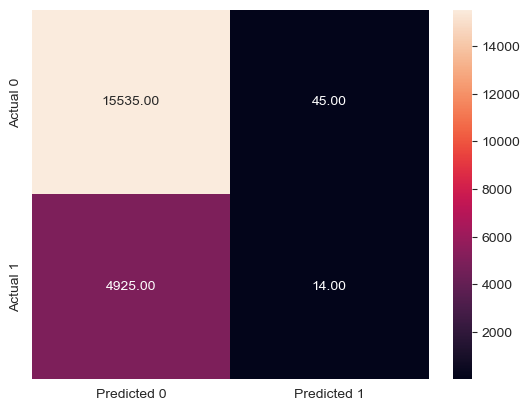

[LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 6 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear]max_iter reached after 4 seconds
max_iter reached after 5 seconds
max_iter reached after 6 seconds
max_iter reached after 4 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear]max_iter reached after 4 seconds
max_iter reached after 5 seconds
max_iter reached after 6 seconds
max_iter reached after 4 seconds
max_iter reached after 5 seconds
e: 0.00331609
Epoch 204, change: 0.00328414
Epoch 205, change: 0.00326448
Epoch 206, change: 0.00324107
Epoch 207, change: 0.00321761
Epoch 208, change: 

[LibLinear][LibLinear]max_iter reached after 4 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 6 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 4 seconds
max_iter reached after 6 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 6 seconds
[LibLinear][LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
e: 0.00324033
Epoch 204, change: 0.00321909
Epoch 205, change: 0.00319409
Epoch 206, change: 0.00317193
Epoch 207, change: 0.00315127
Epoch 20

[LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 6 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 6 seconds
max_iter reached after 4 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear][LibLinear]max_iter reached after 4 seconds
max_iter reached after 5 seconds
max_iter reached after 6 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 4 seconds
max_iter reached after 5 seconds
och 104, change: 0.00821469
Epoch 105, change: 0.00811701
Epoch 106, change: 0.00802427
Epoch 107, change: 0.00794769
Epoch 108, ch

[LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear][LibLinear]max_iter reached after 4 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 5 seconds
[LibLinear][LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 6 seconds
max_iter reached after 4 seconds
max_iter reached after 6 seconds
[LibLinear][LibLinear][LibLinear]max_iter reached after 5 seconds
max_iter reached after 5 seconds
max_iter reached after 4 seconds
och 104, change: 0.00814814
Epoch 105, change: 0.00804156
Epoch 106, change: 0.00795725
Epoch 107, change: 0.

In [13]:
sns.heatmap(confusion_matrix(y_test,y_hat_lr), annot=True, fmt='.2f', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

Text(0, 0.5, 'True Positive Rate')

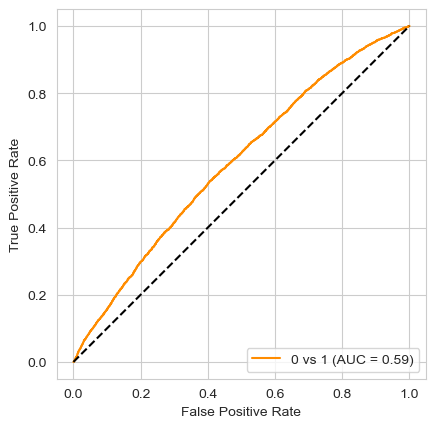

In [14]:
y_score = lr_model.predict_proba(X_test)

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_score[:,1], name="0 vs 1", color="darkorange")
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [ ]:
X_train_sm = sm.add_constant(X_train)

In [ ]:
try:
    lr_model_2 = sm.OLS(y_train, X_train_sm)
    lr_model_sm = lr_model_2.fit()
    print(lr_model_sm.summary())
    print(lr_model_sm.summary2())
except Exception as e:
    print(e)

# Feature selection alternative - SelectKBest

As we see there are several features in dataset with p-values over 0.05. We need to select suitable 

features using regression so that highly correlated ie p-value <0.05

In [ ]:
get_features_kbest = SelectKBest(score_func=f_regression, k=5)

get_features_kbest.fit(X_train,y_train)

In [ ]:
X_train_kb = get_features_kbest.transform(X_train)

In [ ]:
X_test_kb = get_features_kbest.transform(X_test)

# XGBoost Model with features selected using K Best 

In [ ]:
import xgboost as xgb3

eval_set = [(X_train_kb, y_train), (X_test_kb, y_test)]

estimators = [100, 200]

depth = [10, 15]

eta = [0.03, 0.05]

g = [10, 11, 12, 13]

childweight = [ 5, 9, 15, 20, 25]

C = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]

param_grid = dict(C = C, n_estimators = estimators, max_depth = depth, learning_rate = eta, min_child_weight = childweight, gamma = g)

xgb_model3 = xgb3.XGBClassifier(subsample = 0.33)

grid_kb = GSV(estimator= xgb_model3, param_grid = param_grid, n_jobs=-5)

grid_result_2 = grid_kb.fit(X_train_kb, y_train.values.ravel(), early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set)

print("score :%f, using %s"%(grid_result_2.best_score_, grid_result_2.best_params_))

In [ ]:
xgb_model2.fit(X_train_kb,y_train)

y_hat_kb = xgb_model2.predict(X_test_kb)

In [ ]:
print("Training Set Accuracy Score ", xgb_model2.score(X_train_kb,y_train)*100,"%")

print("Test Set Accuracy score ",xgb_model2.score(X_test_kb,y_test)*100,"%")

In [ ]:
print(classification_report(y_test,y_hat_kb))

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_hat_kb), annot=True, fmt = '.1f',xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [ ]:
counter = Counter(y_test)
print(counter)

No significant improvements found in the classifier using K best (f_regression - which is univariate linear regression model and orders correlation of predictors with target based on p-value)

OR

# Bagging Classifier using Decision Tree

This classifier has a tendency to overfit the data. You may see the models below where all of them are poor in predicting based on unseen data.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
seed = 6

kfold = KFold( n_splits=10, random_state=seed , shuffle=True)

In [ ]:
dt_kfold = DecisionTreeClassifier()

baggingclf_dt_kfold = BaggingClassifier(base_estimator=dt_kfold, random_state=seed, n_estimators = 100, verbose=2)

In [ ]:
results = cross_val_score( baggingclf_dt_kfold, X_train, y_train, cv=kfold ,scoring='roc_auc')

In [ ]:
for i in range(len(results)):
    print("Model: "+str(i)+", Accuracy : " +str(results[i]))

In [ ]:
print("Mean Accuracy :"+str(results.mean()))

In [ ]:
model_dt_bag = baggingclf_dt_kfold.fit( X_train, y_train)

In [ ]:
y_hat_bag = model_dt_bag.predict(X_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_hat_bag), annot=True, fmt = '.1f',xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

### Fitting model with X_train_kb - features selected using KBest - f_regression as its underlying model

In [ ]:
model_dt_bag_3 = baggingclf_dt_kfold.fit( X_train_kb, y_train)

y_hat_bag_3 = model_dt_bag_3.predict(X_test_kb)

sns.heatmap(confusion_matrix(y_test,y_hat_bag_3), annot=True, fmt = '.1f',xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

In [ ]:
model_dt_bag_3.n_features_in_

In [ ]:
y_score_prob_kb = model_dt_bag_3.predict_proba(X_test_kb)
y_score_prob_brt = model_dt_bag_2.predict_proba(X_test_brt)

In [ ]:
RocCurveDisplay.from_predictions(
    y_test,
    y_score_prob_kb[:,1],
    name="0 vs 1",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.55)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### Fitting the bagging model using RFE filtered features:

In [ ]:
model_dt_bag_4 = baggingclf_dt_kfold.fit( X_train_rfe, y_train)

y_hat_bag_4 = model_dt_bag_4.predict(X_test_rfe)

sns.heatmap(confusion_matrix(y_test,y_hat_bag_4), annot=True, fmt = '.1f',xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

### Feature Selector using Boruta algorithm

In [16]:
from boruta import BorutaPy

Using XGBoost classifier for Boruta model.

Boruta Model --> a number of randomly shuffled shadow attributes are created to establish the baseline performance. A hypothesis test is then used to determine whether a variable is only randomly correlated or carries significant information. This test, by default, is carried out with a significance level of .05, this can be changed using the alpha argument when creating a BorutaPy object. 

In [17]:
import multiprocessing
n_jobs = multiprocessing.cpu_count()
print(n_jobs)

8


In [18]:
model = xgb.XGBClassifier(eval_metric = 'merror' , n_jobs = -5, seed = 6)

feature_select = BorutaPy(model, n_estimators='100', verbose=2, random_state=6)

In [38]:
X_train.shape

(30777, 53)

In [39]:
y_train.shape

(30777, 1)

In [40]:
y_train.isna().sum()

y    0
dtype: int64

In [ ]:
feature_select.fit( X_train , y_train )

In [ ]:
feature_names = list(zip(df.columns,feature_select.ranking_,feature_select.support_))

feature_boruta = pd.DataFrame(feature_names, columns=['Columns','Ranks', 'T/F'])

In [ ]:
feature_boruta[feature_boruta['T/F']==True]

### Transforming the X_train and X_test after feature selection using Boruta 

In [ ]:
X_train_brt = feature_select.transform(X_train)

X_train_brt.shape

In [ ]:
X_test_brt = feature_select.transform(X_test)

X_test_brt.shape

### Fitting model with X_train_brt - features selected by Boruta.

The kind of features shortlisted by Boruta must be tried with Bagging technique.

In [ ]:
model_dt_bag_2 = baggingclf_dt_kfold.fit( X_train_brt, y_train)

y_hat_bag_2 = model_dt_bag_2.predict(X_test_brt)

sns.heatmap(confusion_matrix(y_test,y_hat_bag_2), annot=True, fmt = '.1f',xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])